### Business Case: Delhivery - Feature Engineering

### About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure,logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### Objective

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

#### Why this case study?

From Delhivery’s Perspective:

* Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.
* It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.
* First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.
* Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.
*  Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.
*  By conducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.

### Column Profiling:

* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
* Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import norm,zscore,boxcox,probplot
from scipy.stats import ttest_ind,ttest_rel,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,kstest,anderson
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('delhivery_data.csv')

In [4]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,False,70,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


# Data Exploration

In [6]:
df.shape

(144867, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [9]:
# removing unknown columns

df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], inplace=True)

In [10]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [11]:
#Converting data type of categorical columns
df['route_type'] = df['route_type'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   data                            144867 non-null  object  
 1   trip_creation_time              144867 non-null  object  
 2   route_schedule_uuid             144867 non-null  object  
 3   route_type                      144867 non-null  category
 4   trip_uuid                       144867 non-null  object  
 5   source_center                   144867 non-null  object  
 6   source_name                     144574 non-null  object  
 7   destination_center              144867 non-null  object  
 8   destination_name                144606 non-null  object  
 9   od_start_time                   144867 non-null  object  
 10  od_end_time                     144867 non-null  object  
 11  start_scan_to_end_scan          144867 non-null  float64 
 12  ac

# Statistical Summary

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [14]:
df.describe(include = "object").T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81
od_end_time,144867,26369,2018-09-24 09:59:15.691618,81


In [15]:
#checking duplicates
df.duplicated().sum()

0

There are no duplicates in the data.

# Handle missing values in the data

In [16]:
#checking missing values percentage
df.isnull().sum()/df.shape[0] *100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
dtype: float64

In [17]:
#removing null values
df.dropna(subset = ['source_name','destination_name'], inplace = True)

In [18]:
#checking null values
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [19]:
df.shape

(144316, 19)

# Converting time columns into pandas datetime.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   data                            144316 non-null  object  
 1   trip_creation_time              144316 non-null  object  
 2   route_schedule_uuid             144316 non-null  object  
 3   route_type                      144316 non-null  category
 4   trip_uuid                       144316 non-null  object  
 5   source_center                   144316 non-null  object  
 6   source_name                     144316 non-null  object  
 7   destination_center              144316 non-null  object  
 8   destination_name                144316 non-null  object  
 9   od_start_time                   144316 non-null  object  
 10  od_end_time                     144316 non-null  object  
 11  start_scan_to_end_scan          144316 non-null  float64 
 12  ac

In [21]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

# Grouping by segment

In [23]:
df['segment_key'] = df['trip_uuid']+ '_'+df['source_center']+'_'+ df['destination_center']

In [24]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB


In [25]:
columns = ['segment_actual_time','segment_osrm_distance','segment_osrm_time']
for col in columns:
    df[col +'_sum'] = df.groupby('segment_key')[col].cumsum()

In [26]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


In [27]:
df[df['segment_key']== 'trip-153741093647649320_IND388121AAA_IND388620AAB']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


In [28]:
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182_IND131028AAB_IND000000ACB,92.0,65.3487,94.0
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182_IND131028AAB_IND000000ACB,118.0,82.7212,115.0
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182_IND131028AAB_IND000000ACB,138.0,103.4265,149.0
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182_IND131028AAB_IND000000ACB,155.0,122.3150,176.0
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,70.039010,426.0,95.0,88.7319,268.0,9.0,8.8088,trip-153746066843555182_IND131028AAB_IND000000ACB,423.0,131.1238,185.0


# Aggregating at segment level

In [29]:
merge_segment = {'data': 'first',
             'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'sum',
              'segment_osrm_time':'sum',
              'segment_osrm_distance':'sum',
              'segment_actual_time_sum': 'last',
              'segment_osrm_distance_sum' : 'last',
             'segment_osrm_time_sum'  : 'last'}

In [30]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_key',
       'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

In [31]:
segment_df = df.groupby('segment_key').agg(merge_segment).reset_index()
segment_df.head()
segment_df = segment_df.sort_values(by = ['segment_key','od_end_time'])
segment_df.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,317.7408,231.0


In [32]:
segment_df.shape

(26222, 23)

# Feature Engineering

In [33]:
segment_df['od_time_diff'] = segment_df['od_end_time'] - segment_df['od_start_time']
segment_df['od_time_diff'].tail()
segment_df['od_time_diff_hour'] = segment_df['od_time_diff'].dt.total_seconds() // 3600

In [34]:
df.drop(labels = ['od_end_time','od_start_time'], axis = 1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182_IND131028AAB_IND000000ACB,92.0,65.3487,94.0
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182_IND131028AAB_IND000000ACB,118.0,82.7212,115.0
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182_IND131028AAB_IND000000ACB,138.0,103.4265,149.0
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182_IND131028AAB_IND000000ACB,155.0,122.3150,176.0


In [35]:
#extracting state
def extract_state(a):
  return a.split('(')[1][:-1]
segment_df['destination_state'] = segment_df.destination_name.apply(extract_state)
segment_df.destination_state.value_counts()

Karnataka                 3497
Maharashtra               3473
Tamil Nadu                2111
Haryana                   2014
Uttar Pradesh             1828
Telangana                 1539
Gujarat                   1401
West Bengal               1399
Andhra Pradesh            1309
Rajasthan                 1201
Punjab                    1132
Bihar                     1053
Kerala                     746
Madhya Pradesh             739
Delhi                      702
Assam                      465
Uttarakhand                367
Jharkhand                  309
Orissa                     260
Himachal Pradesh           241
Chandigarh                 123
Goa                         86
Arunachal Pradesh           55
Chhattisgarh                52
Jammu & Kashmir             45
Pondicherry                 31
Dadra and Nagar Haveli      17
Meghalaya                   13
Mizoram                     10
Tripura                      2
Nagaland                     1
Daman & Diu                  1
Name: de

In [36]:
#extracting city
def extract_city(a):
  if '_' not in a:
    return a.split(' ')[0]
  else:
    return a.split('_')[0]

segment_df['destination_city'] = segment_df.destination_name.apply(extract_city)

In [37]:
#extracting place
def extract_place(a):
    if '_' not in a:
        return a.split(' ')[1]
    else:
        return a.split('_')[1]
segment_df['destination_place'] = segment_df.destination_name.apply(extract_place)    

In [38]:
segment_df['destination_place'].value_counts()

Central     1860
Bilaspur     971
Nelmngla     665
Mankoli      614
Shamshbd     464
            ... 
Barout         1
Brplicwk       1
AmbedDPP       1
DMComDPP       1
VrdhriRD       1
Name: destination_place, Length: 1179, dtype: int64

In [39]:
#Extracting state and city from source_name
segment_df['source_state'] = segment_df.source_name.apply(extract_state)
segment_df['source_city'] = segment_df.source_name.apply(extract_city)
segment_df['source_place'] = segment_df.source_name.apply(extract_place)

In [40]:
state_counts = segment_df['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']
state_counts

,State,Count
0,Maharashtra,3565
1,Karnataka,3445
2,Tamil Nadu,2130
3,Haryana,2039
4,Uttar Pradesh,1818
5,Telangana,1474
6,Gujarat,1401
7,West Bengal,1368
8,Andhra Pradesh,1310
9,Rajasthan,1162


In [41]:
segment_df.isnull().sum()

segment_key                       0
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_actual_time_sum           0
segment_osrm_distance_sum         0
segment_osrm_time_sum             0
od_time_diff                      0
od_time_diff_hour                 0
destination_state                 0
destination_city                  0
destination_place           

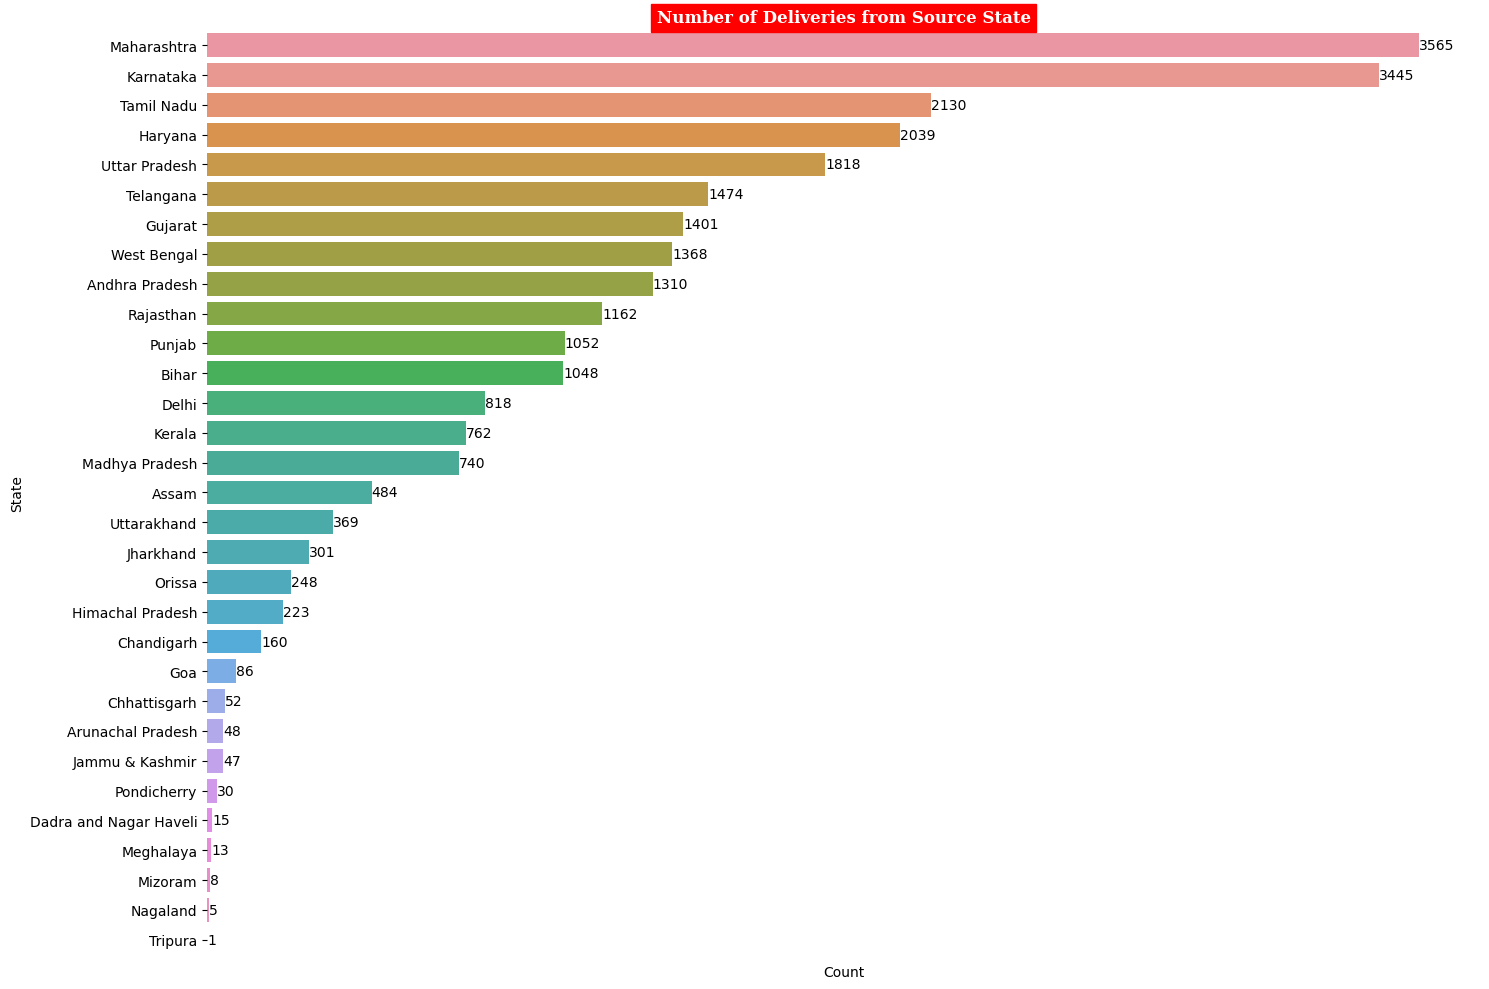

In [42]:
state_counts = segment_df['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

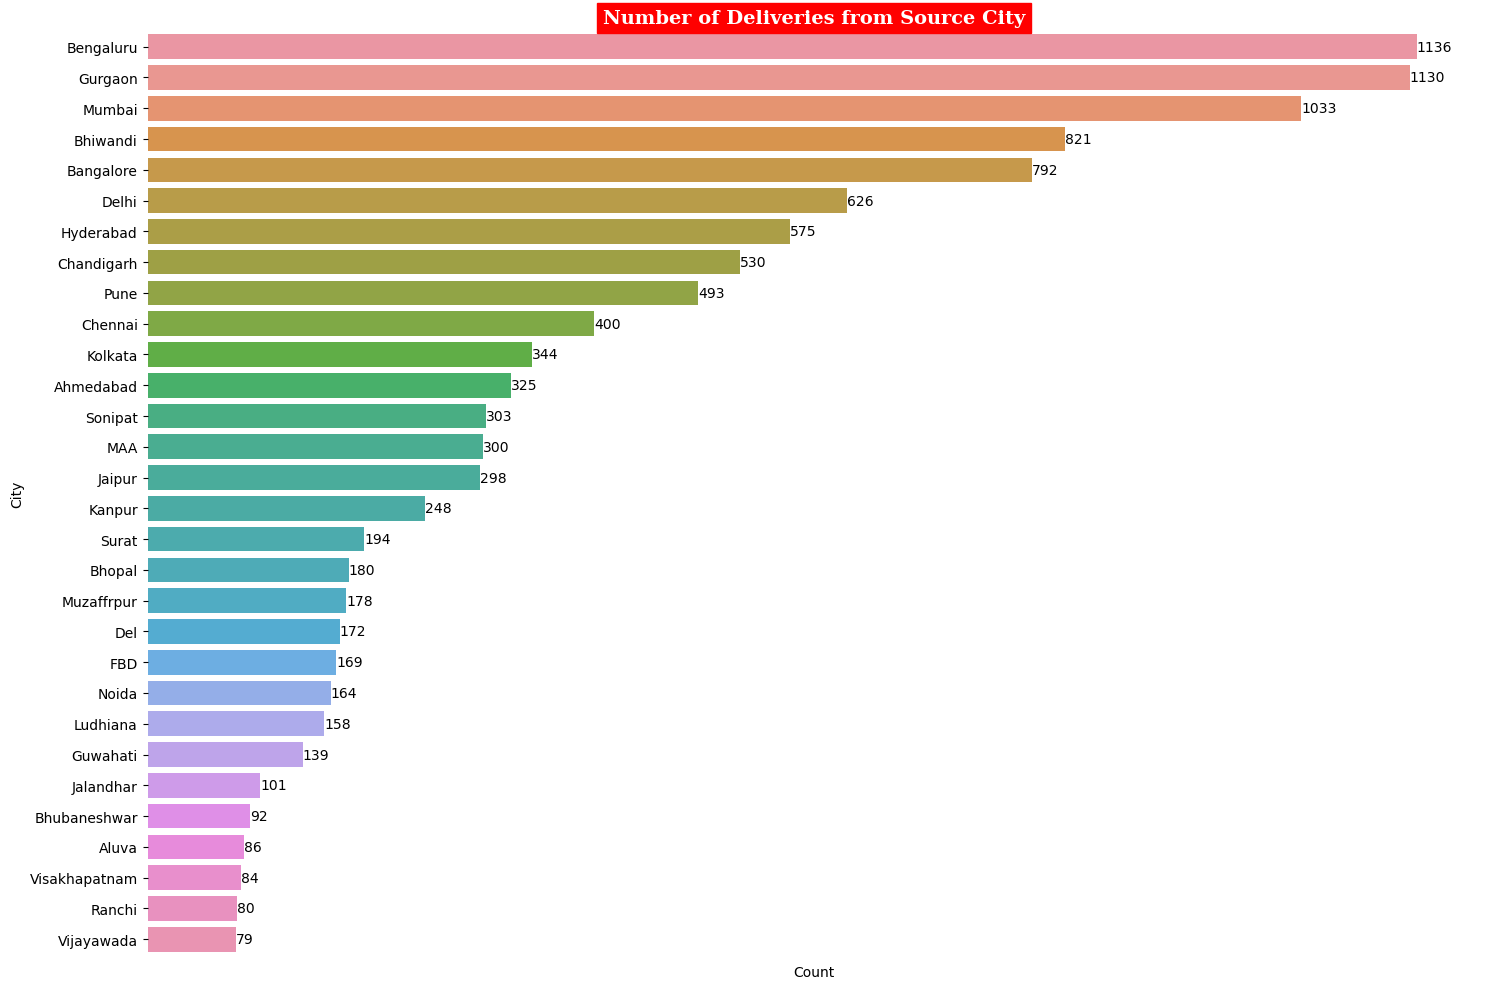

In [43]:
city_counts = segment_df['source_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

### Insights:

* Source State contributors : Maharashtra, Karnataka ,Tamil Nadu, Haryana, and Uttar Pradesh are the top contributors where maximum bookings are recorded in this month indicating significant engagement.
Source City contributors

* Cities like Bengaluru, Gurgaon, Mumbai, Bhiwandi, Delhi, Hyderabad where the major no.of booking are recorded.

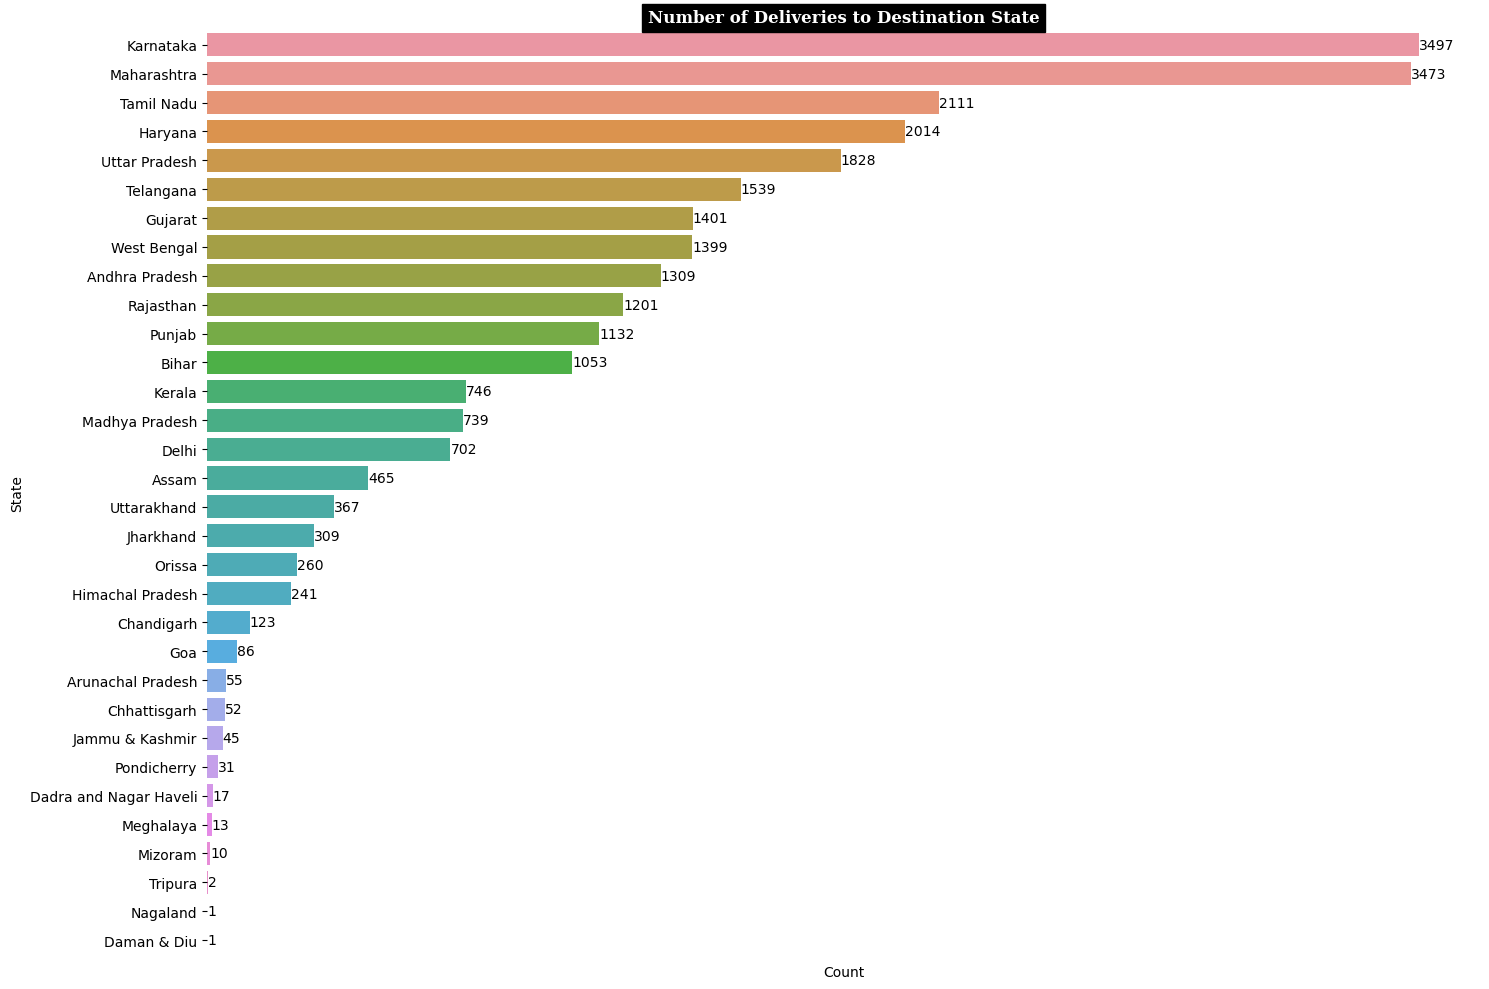

In [44]:
state_counts = segment_df['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

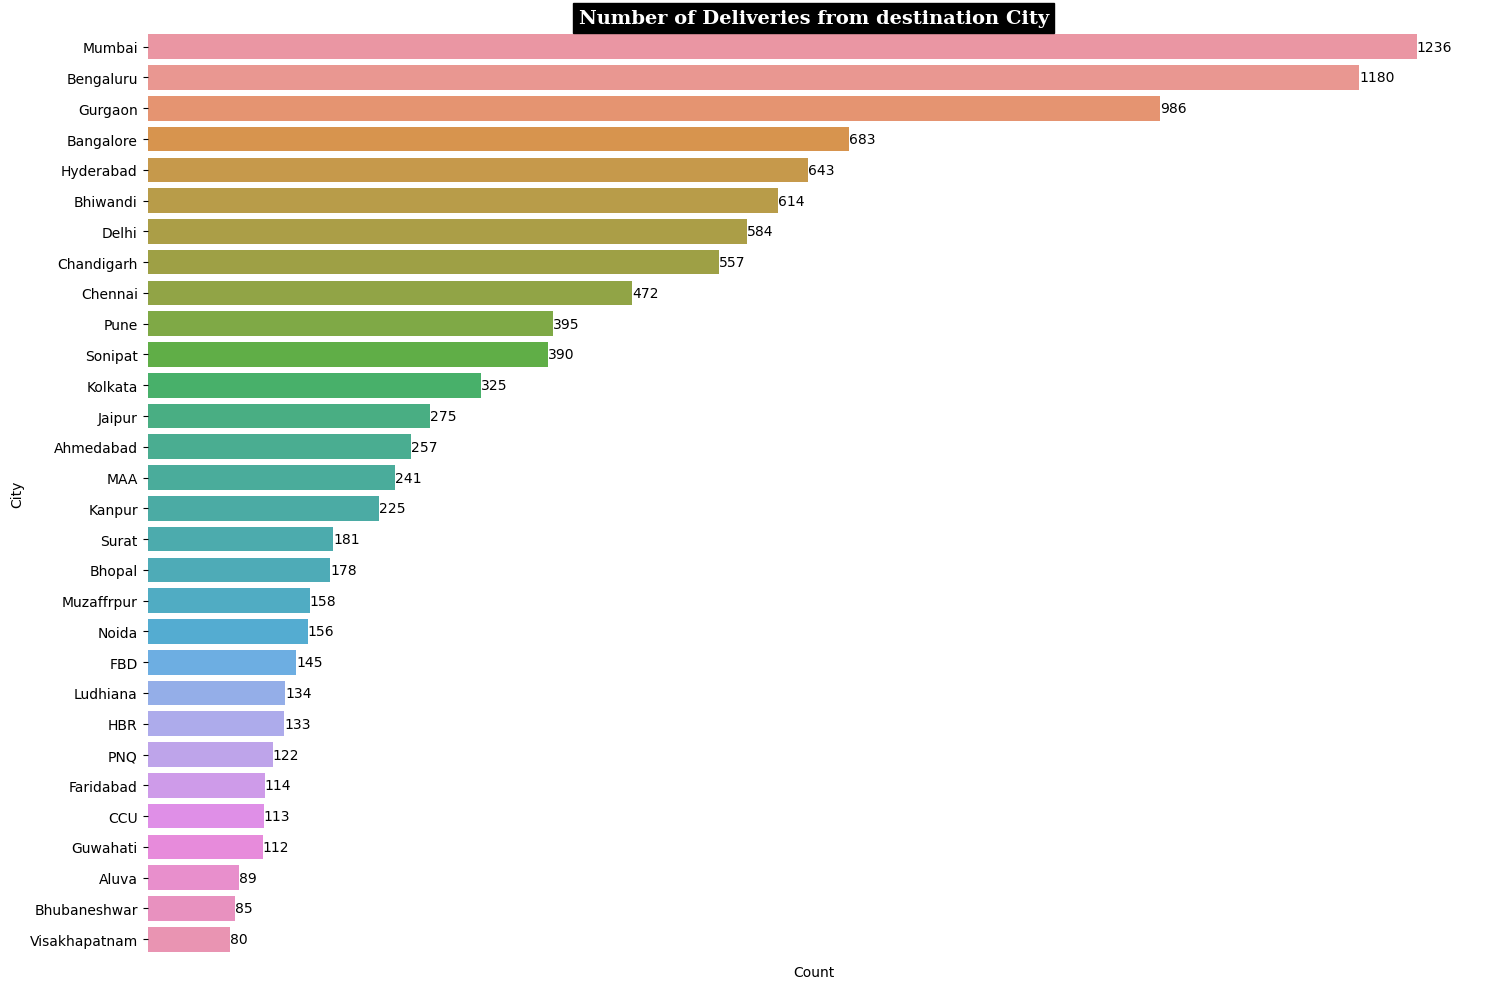

In [45]:
city_counts = segment_df['destination_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']

plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from destination City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

### Insights:

* Destination State:States like Karnataka, Maharashtra, Tamil Nadu, Haryana, and Uttar Pradesh where maximum packages are received in this month indicating significant engagement.
Destination City

* Cities like Bengaluru, Mumbai, Gurgaon, Bhiwandi, Hyderabad, Delhi where the major no.of booking are received.

In [46]:
segment_df['corridor'] = segment_df['source_name'] +' <---> '+ segment_df['destination_name']
segment_df['corridor'].value_counts()

Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)            151
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_Bomsndra_HB (Karnataka)            127
Bengaluru_Bomsndra_HB (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka)           121
Bengaluru_KGAirprt_HB (Karnataka) <---> Bangalore_Nelmngla_H (Karnataka)            108
Pune_Tathawde_H (Maharashtra) <---> Bhiwandi_Mankoli_HB (Maharashtra)               107
                                                                                   ... 
Ongole_SubhVRTL_I (Andhra Pradesh) <---> Kandukur_LICOffce_D (Andhra Pradesh)         1
Madnapalle_PngnrRd_D (Andhra Pradesh) <---> Palamaner_Lakshmi_D (Andhra Pradesh)      1
Dharmavram_SaiNgr_D (Andhra Pradesh) <---> Kadiri_GVManu_D (Andhra Pradesh)           1
Baharampur_Chuanpur_I (West Bengal) <---> Chapra_NagarDPP_D (West Bengal)             1
Jaipur_NgrNigam_DC (Rajasthan) <---> Jaipur_Central_D_1 (Rajasthan)                   1
Name: corridor, Length: 2741, dt

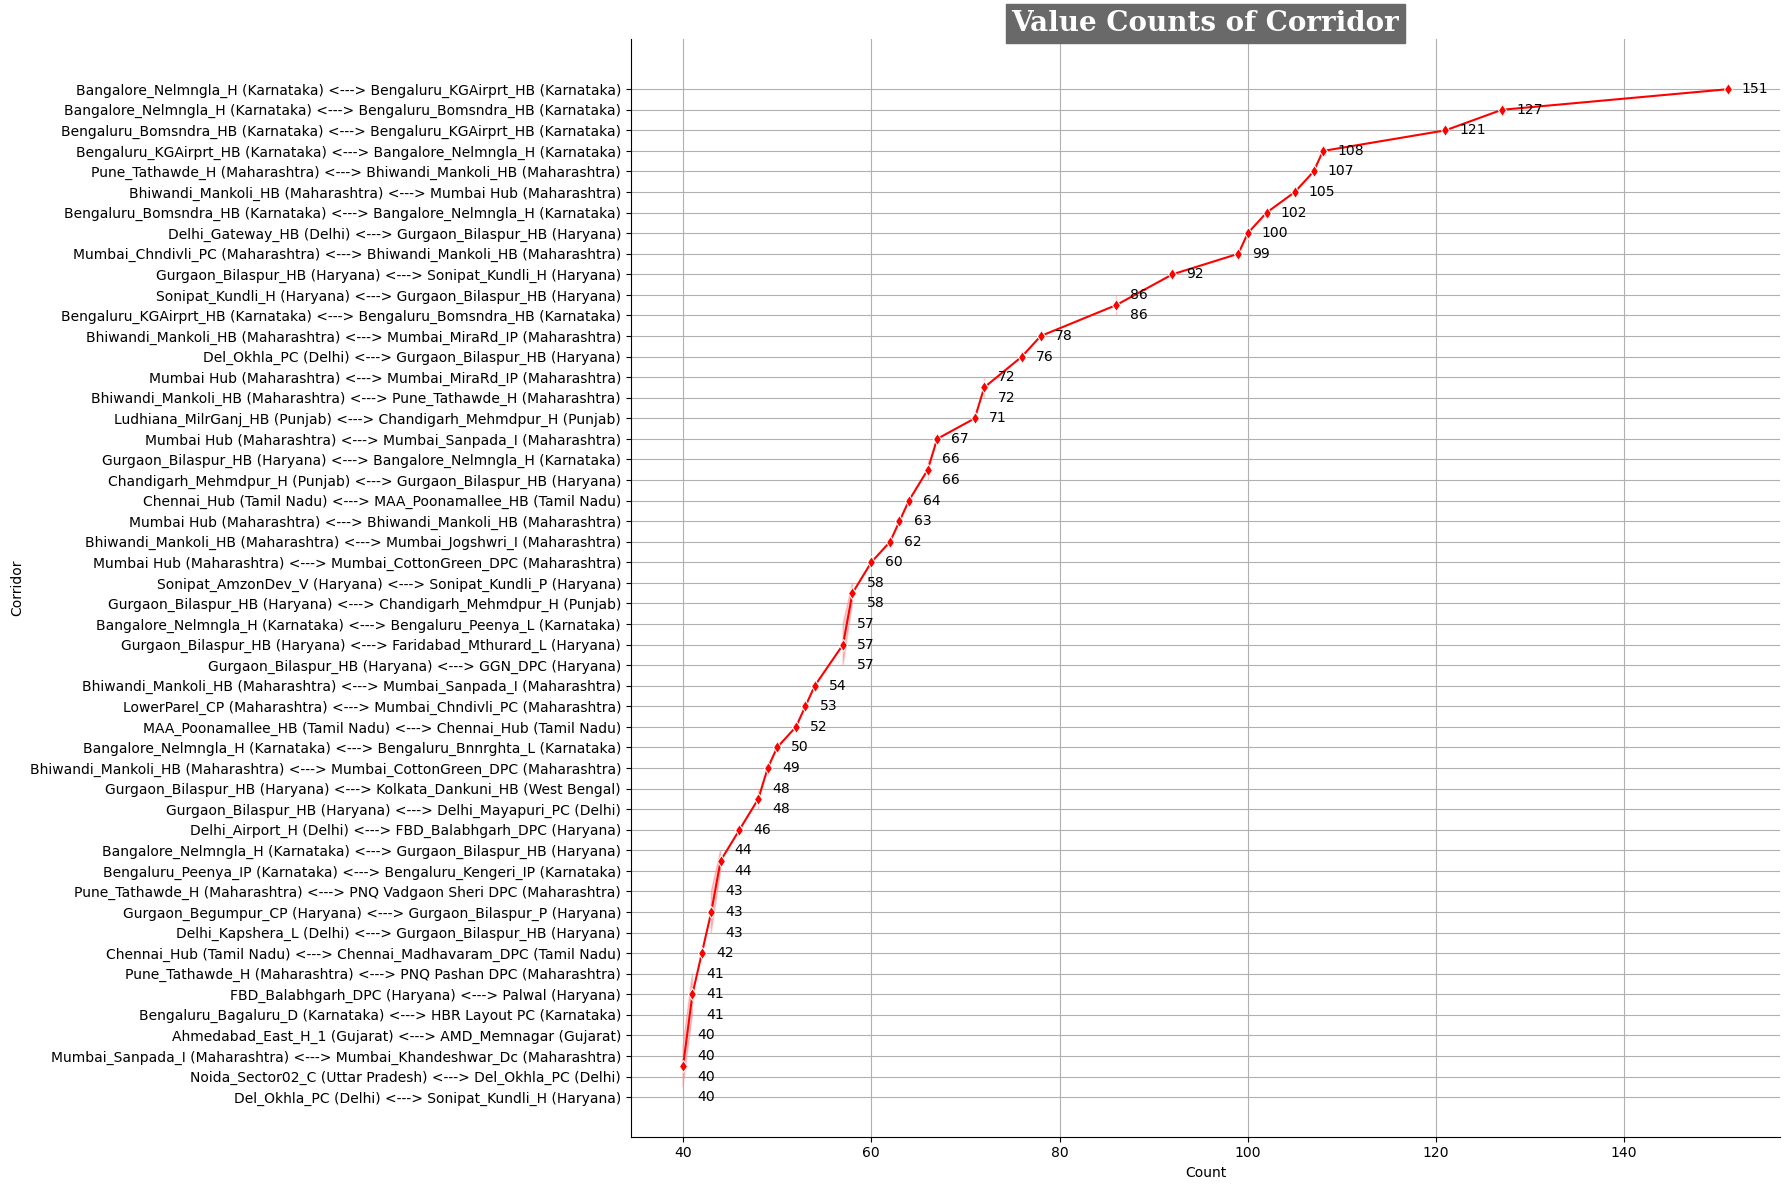

In [47]:
corridor_counts = segment_df['corridor'].value_counts()[:50]

plt.figure(figsize=(18,12))
#corridor_counts.plot(kind='line', marker='d', color='r')
sns.lineplot(y=corridor_counts.index, x=corridor_counts.values, marker='d', color='r')
plt.title('Value Counts of Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgrey',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(corridor_counts.values):
    plt.text(count+1.5, corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

#### Insights:
* The route between Bangalore_Nelamangala_H to Bengaluru_KGAirport_HB,Bengaluru_Bomsndra_HB sees the highest package volume, with 151 and 127 packages sent respectively.
* Bengaluru_Bommasandra_HB to Bengaluru_KGAirport_HB is also popular, with 121 packages sent.
* Bengaluru_KGAirport_HB to Bangalore_Nelamangala_H has moderate activity, with 108 packages sent.
* The data indicates Bengaluru's importance as a transportation hub Corridor within Karnataka, handling significant package traffic.

In [48]:
segment_df['state_corridor'] = segment_df['source_state']+'--'+segment_df['source_city'] +' <---> '+ segment_df['destination_state']+'--'+segment_df['destination_city'] 
segment_df['state_corridor'].value_counts()

Maharashtra--Mumbai <---> Maharashtra--Mumbai                     622
Karnataka--Bengaluru <---> Karnataka--Bengaluru                   565
Maharashtra--Bhiwandi <---> Maharashtra--Mumbai                   512
Karnataka--Bangalore <---> Karnataka--Bengaluru                   492
Karnataka--Bengaluru <---> Karnataka--Bangalore                   356
                                                                 ... 
Gujarat--Jetpur <---> Gujarat--Dhoraji                              1
Andhra Pradesh--Anakapalle <---> Andhra Pradesh--Visakhapatnam      1
Andhra Pradesh--Narsiptnm <---> Andhra Pradesh--Anakapalle          1
Karnataka--Channaraya <---> Karnataka--Krishnarajpet                1
Uttar Pradesh--Anandnagar <---> Uttar Pradesh--Gorakhpur            1
Name: state_corridor, Length: 2316, dtype: int64

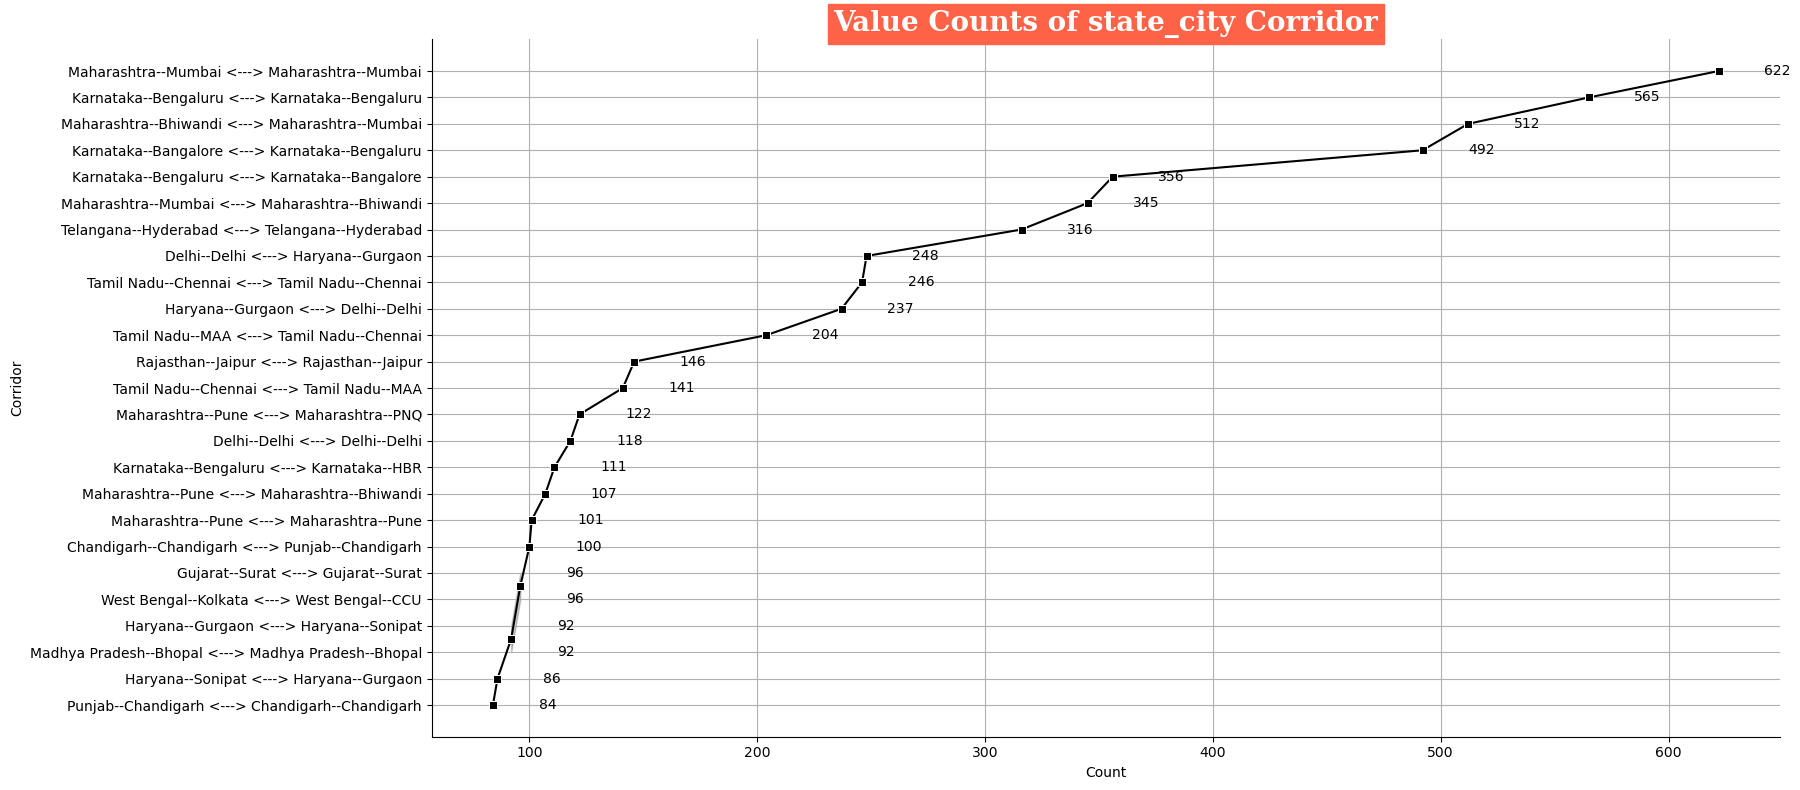

In [49]:
state_corridor_counts = segment_df['state_corridor'].value_counts()[:25]

plt.figure(figsize=(18,8))
sns.lineplot(y=state_corridor_counts.index, x=state_corridor_counts.values, marker='s', color='k')
plt.title('Value Counts of state_city Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='tomato',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(state_corridor_counts.values):
    plt.text(count+20, state_corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

In [50]:
segment_df['city_corridor'] = segment_df['source_city']+'--'+segment_df['source_place'] +' <---> '+ segment_df['destination_city']+'--'+segment_df['destination_place'] 
display(segment_df['city_corridor'].value_counts())

Bangalore--Nelmngla <---> Bengaluru--KGAirprt     151
Bangalore--Nelmngla <---> Bengaluru--Bomsndra     127
Bengaluru--Bomsndra <---> Bengaluru--KGAirprt     121
Bengaluru--KGAirprt <---> Bangalore--Nelmngla     108
Pune--Tathawde <---> Bhiwandi--Mankoli            107
                                                 ... 
Bangalore--Nelmngla <---> Davangere--Central        1
Mandapeta--Mainrd <---> Rajamundry--AtoNgrRd        1
Tuni--Eaglvari <---> Mandapeta--Mainrd              1
Rajamundry--AtoNgrRd <---> Amalapuram--Vijdurg      1
Anandnagar--LohiaDPP <---> Gorakhpur--Matriprm      1
Name: city_corridor, Length: 2705, dtype: int64

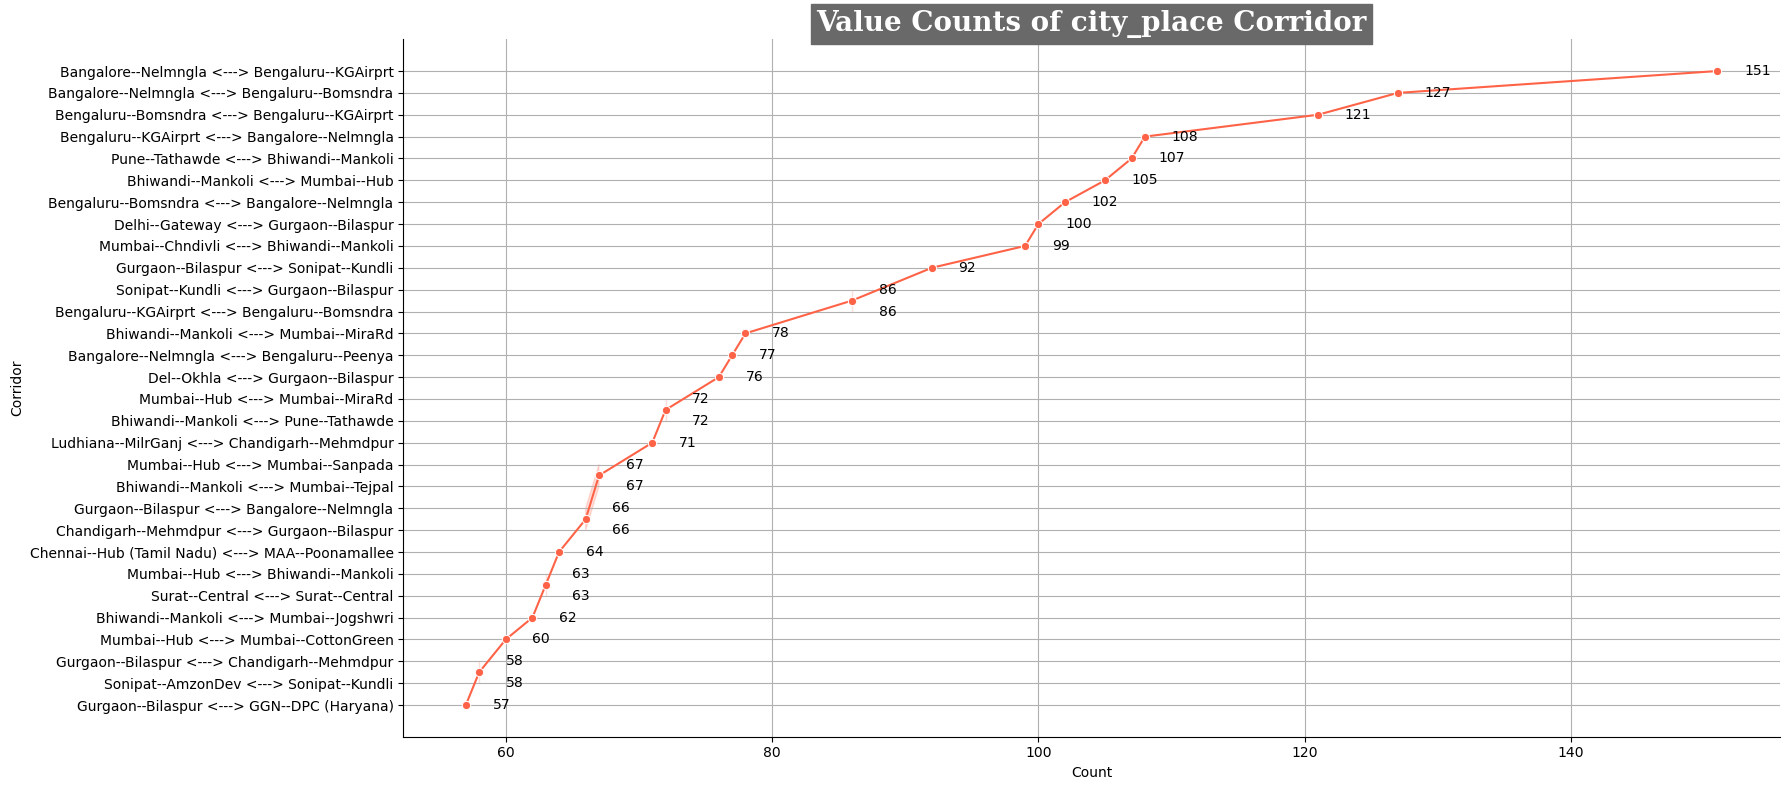

In [51]:
city_corridor_counts = segment_df['city_corridor'].value_counts()[:30]

plt.figure(figsize=(18,8))
sns.lineplot(y=city_corridor_counts.index, x=city_corridor_counts.values, marker='o', color='tomato')
plt.title('Value Counts of city_place Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgray',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(city_corridor_counts.values):
    plt.text(count+2, city_corridor_counts.index[i], str(count), ha='left', va='center')

plt.show()

#### Insights:
* Maharashtra, Karnataka, Haryana, and Tamil Nadu serve as key starting and ending locations for delivery services.
* Mumbai, Gurgaon, Delhi, and Bengaluru are major metropolitan centers from where many deliveries originate.
* A large proportion of nationwide deliveries are destined for Mumbai, Bengaluru, Gurgaon, and Delhi.

In [52]:
segment_df['trip_creation_month'] = segment_df['trip_creation_time'].dt.month
segment_df['trip_creation_year'] = segment_df['trip_creation_time'].dt.year
segment_df['trip_creation_day'] = segment_df['trip_creation_time'].dt.day
segment_df['trip_creation_hour'] = segment_df['trip_creation_time'].dt.hour
segment_df['trip_creation_weekday'] = segment_df['trip_creation_time'].dt.weekday
segment_df['trip_creation_week'] = segment_df['trip_creation_time'].dt.isocalendar().week
segment_df.head()

,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff,od_time_diff_hour,destination_state,destination_city,destination_place,source_state,source_city,source_place,corridor,state_corridor,city_corridor,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,670.6205,534.0,0 days 21:00:36.265275,21.0,Haryana,Gurgaon,Bilaspur,Uttar Pradesh,Kanpur,Central,Kanpur_Central_H_6 (Uttar Pradesh) <---> Gurga...,Uttar Pradesh--Kanpur <---> Haryana--Gurgaon,Kanpur--Central <---> Gurgaon--Bilaspur,9,2018,12,0,2,37
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,649.8528,474.0,0 days 16:39:30.322728,16.0,Uttar Pradesh,Kanpur,Central,Madhya Pradesh,Bhopal,Trnsport,Bhopal_Trnsport_H (Madhya Pradesh) <---> Kanpu...,Madhya Pradesh--Bhopal <---> Uttar Pradesh--Ka...,Bhopal--Trnsport <---> Kanpur--Central,9,2018,12,0,2,37
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,28.1995,26.0,0 days 00:58:49.943264,0.0,Karnataka,Chikblapur,ShntiSgr,Karnataka,Doddablpur,ChikaDPP,Doddablpur_ChikaDPP_D (Karnataka) <---> Chikbl...,Karnataka--Doddablpur <---> Karnataka--Chikblapur,Doddablpur--ChikaDPP <---> Chikblapur--ShntiSgr,9,2018,12,0,2,37
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,55.9899,39.0,0 days 02:02:46.769161,2.0,Karnataka,Doddablpur,ChikaDPP,Karnataka,Tumkur,Veersagr,Tumkur_Veersagr_I (Karnataka) <---> Doddablpur...,Karnataka--Tumkur <---> Karnataka--Doddablpur,Tumkur--Veersagr <---> Doddablpur--ChikaDPP,9,2018,12,0,2,37
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,317.7408,231.0,0 days 13:54:38.335721,13.0,Punjab,Chandigarh,Mehmdpur,Haryana,Gurgaon,Bilaspur,Gurgaon_Bilaspur_HB (Haryana) <---> Chandigarh...,Haryana--Gurgaon <---> Punjab--Chandigarh,Gurgaon--Bilaspur <---> Chandigarh--Mehmdpur,9,2018,12,0,2,37


# In-depth analysis

## Grouping and Aggregating at Trip-leve

In [53]:
create_trip_dict={
  'data' : 'first',
  'route_type' : 'first',
  'od_start_time':'first',
  'od_end_time':'last',
  'od_time_diff_hour' : 'sum',
  'trip_creation_time' : 'first',
  'trip_creation_month' : 'first',
  'trip_creation_year' : 'first',
  'trip_creation_day' : 'first',
  'trip_creation_hour' : 'first',
  'trip_creation_weekday' : 'first',
  'trip_creation_week' : 'first',
  'start_scan_to_end_scan' : 'sum',
  'actual_distance_to_destination' : 'sum',
  'actual_time' : 'sum',
  'osrm_time' : 'sum',
  'osrm_distance' : 'sum',
  'segment_actual_time':'sum',
  'segment_osrm_time':'sum',
  'segment_osrm_distance':'sum',
  'segment_actual_time_sum': 'sum',
  'segment_osrm_time_sum': 'sum',
  'segment_osrm_distance_sum': 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_distance_sum' : 'last',
  'segment_osrm_time_sum'  : 'last',
  'source_name': 'first',
  'source_city':'first', 
  'source_state':'first', 
  'source_place':'first',
  'destination_name': 'first',
  'destination_city':'first',
  'destination_state':'first',
  'destination_place':'first'
  }

trip_df = segment_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
trip_df

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,source_name,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.0,2018-09-12 00:00:16.535741,9,2018,12,0,2,37,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,820.0,474.0,649.8528,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,2.0,2018-09-12 00:00:22.886430,9,2018,12,0,2,37,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,95.0,39.0,55.9899,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,Karnataka,ChikaDPP,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,64.0,2018-09-12 00:00:33.691250,9,2018,12,0,2,37,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,2700.0,1710.0,2227.5270,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.0,2018-09-12 00:01:00.113710,9,2018,12,0,2,37,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766,Mumbai Hub (Maharashtra),Mumbai,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.0,2018-09-12 00:02:09.740725,9,2018,12,0,2,37,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,63.0,26.0,29.5697,Bellary_Dc (Karnataka),Bellary,Karnataka,Dc (Karnataka),Hospet (Karnataka),Hospet,Karnataka,(Karnataka)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,3.0,2018-10-03 23:55:56.258533,10,2018,3,23,2,40,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,49.0,34.0,35.9560,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur,Zirakpur_DC (Punjab),Zirakpur,Punjab,DC (Punjab)
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.0,2018-10-03 23:57:23.863155,10,2018,3,23,2,40,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883,FBD_Balabhgarh_DPC (Haryana),FBD,Haryana,Balabhgarh,Faridabad_Blbgarh_DC (Haryana),Faridabad,Haryana,Blbgarh
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,6.0,2018-10-03 23:57:44.429324,10,2018,3,23,2,40,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,91.0,52.0,69.4497,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur,Uttar Pradesh,GovndNgr,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,3.0,2018-10-03 23:59:14.390954,10,2018,3,23,2,40,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,29.0,14.0,16.0184,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli,Tamil Nadu,VdkkuSrt,Eral_Busstand_D (Tamil Nadu),Eral,Tamil Nadu,Busstand


In [54]:
trip_df.shape

(14787, 32)

In [55]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   route_type                      14787 non-null  category      
 3   od_start_time                   14787 non-null  datetime64[ns]
 4   od_end_time                     14787 non-null  datetime64[ns]
 5   od_time_diff_hour               14787 non-null  float64       
 6   trip_creation_time              14787 non-null  datetime64[ns]
 7   trip_creation_month             14787 non-null  int64         
 8   trip_creation_year              14787 non-null  int64         
 9   trip_creation_day               14787 non-null  int64         
 10  trip_creation_hour              14787 non-null  int64         
 11  tr

In [56]:
trip_df.describe()

,od_time_diff_hour,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
count,14787.000000,14787.000000,14787.0,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,7.958477,9.120105,2018.0,18.375127,12.456212,2.920944,38.293907,529.399405,164.090196,356.306012,160.990938,203.887411,353.059174,180.511598,222.705466,225.316562,114.776493,142.270822
std,10.843134,0.325096,0.0,7.882198,7.987387,1.927690,0.967366,658.201130,305.502982,561.517936,271.459495,370.565564,556.365911,314.679279,416.846279,439.757333,249.377436,331.476117
min,0.000000,9.000000,2018.0,1.000000,0.000000,0.000000,37.000000,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,2.000000,9.000000,2018.0,14.000000,4.000000,1.000000,38.000000,149.000000,22.777099,67.000000,29.000000,30.756900,66.000000,30.000000,32.578850,50.000000,24.000000,27.099850
50%,4.000000,9.000000,2018.0,19.000000,14.000000,3.000000,38.000000,279.000000,48.287894,148.000000,60.000000,65.302800,147.000000,65.000000,69.784200,85.000000,41.000000,43.438900
75%,9.000000,9.000000,2018.0,25.000000,20.000000,5.000000,39.000000,632.000000,163.591258,367.000000,168.000000,206.644200,364.000000,184.000000,216.560600,180.000000,81.000000,94.458650
max,131.000000,10.000000,2018.0,30.000000,23.000000,6.000000,40.000000,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,4504.000000,1938.000000,2640.924700


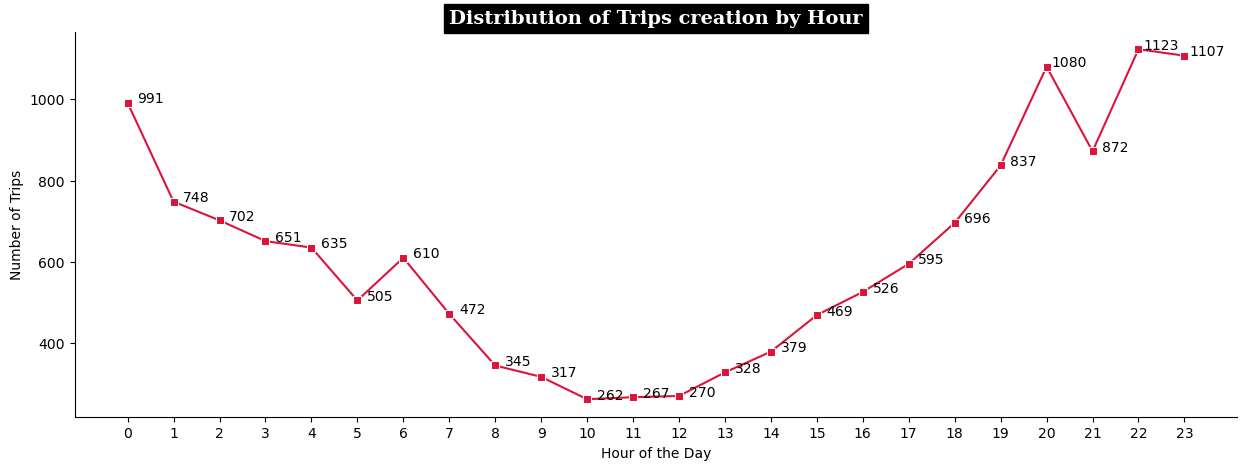

In [57]:
trip_creation_by_hour = trip_df.groupby(by='trip_creation_hour')['trip_uuid'].count().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=trip_creation_by_hour, x='trip_creation_hour', y='trip_uuid', marker='s', color='crimson')
plt.xticks(np.arange(0, 24))

for i, count in enumerate(trip_creation_by_hour['trip_uuid']):
    plt.text(trip_creation_by_hour['trip_creation_hour'][i]+0.5, count, count, ha='center')

plt.title('Distribution of Trips creation by Hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

In [58]:
trip_df.trip_creation_year.value_counts()

2018    14787
Name: trip_creation_year, dtype: int64

In [59]:
trip_df.trip_creation_month.value_counts()

9     13011
10     1776
Name: trip_creation_month, dtype: int64

In [60]:
trip_df['trip_creation_month'].value_counts(normalize = True) * 100

9     87.98945
10    12.01055
Name: trip_creation_month, dtype: float64

In [61]:
trip_df.trip_creation_week.value_counts()

38    5001
39    4402
37    3608
40    1776
Name: trip_creation_week, dtype: Int64

In [62]:
trip_df.trip_creation_weekday.value_counts(ascending=True)

6    1753
0    1980
1    2035
4    2057
3    2103
5    2128
2    2731
Name: trip_creation_weekday, dtype: int64

In [63]:
trip_df['trip_creation_day_week'] = trip_df['trip_creation_time'].dt.day_name()

In [64]:
trip_df.trip_creation_day.value_counts()

18    791
15    783
13    750
12    747
21    740
22    740
17    722
14    712
20    703
25    695
26    683
19    674
24    658
27    650
23    631
3     627
16    616
28    605
29    605
1     600
2     549
30    506
Name: trip_creation_day, dtype: int64

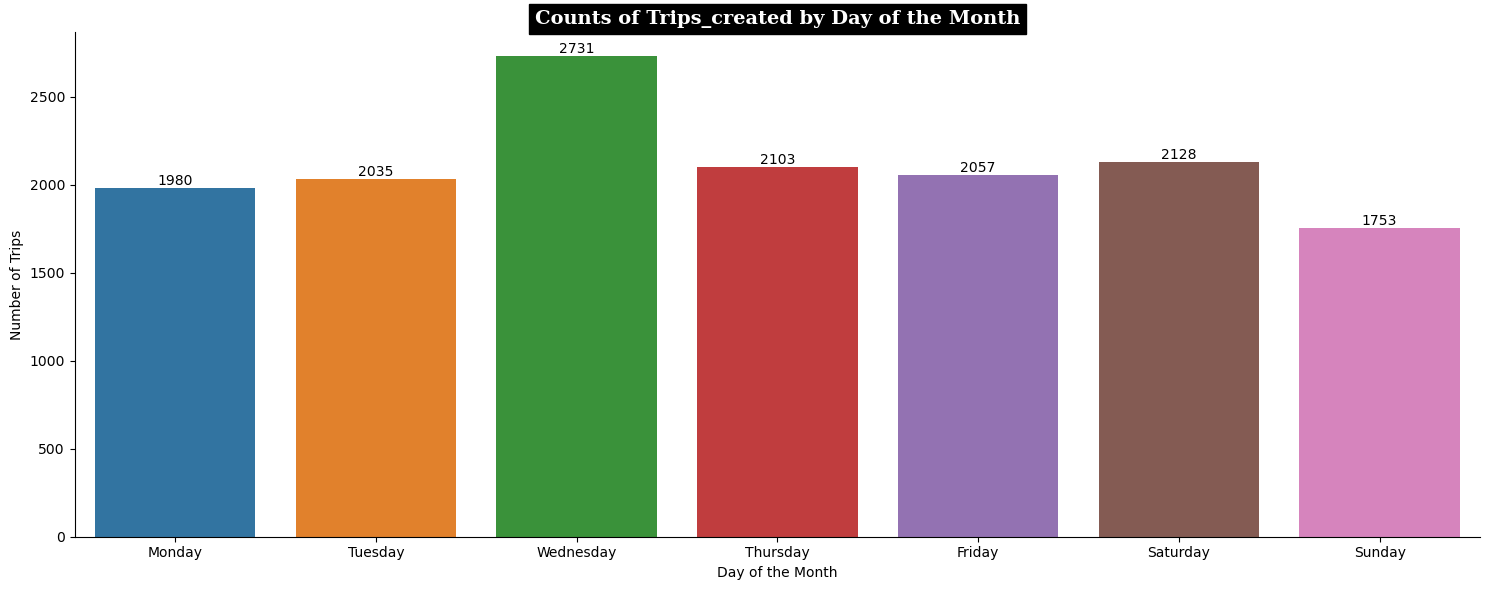

In [65]:
plt.figure(figsize=(15,6))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = trip_df['trip_creation_day_week'].value_counts().reindex(weekday_order)

sns.barplot(x=day_counts.index, y=day_counts.values)
for i, count in enumerate(day_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Counts of Trips_created by Day of the Month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.tight_layout()
sns.despine()
plt.show()

In [66]:
trip_df['trip_creation_dayofdate'] = trip_df['trip_creation_time'].dt.day

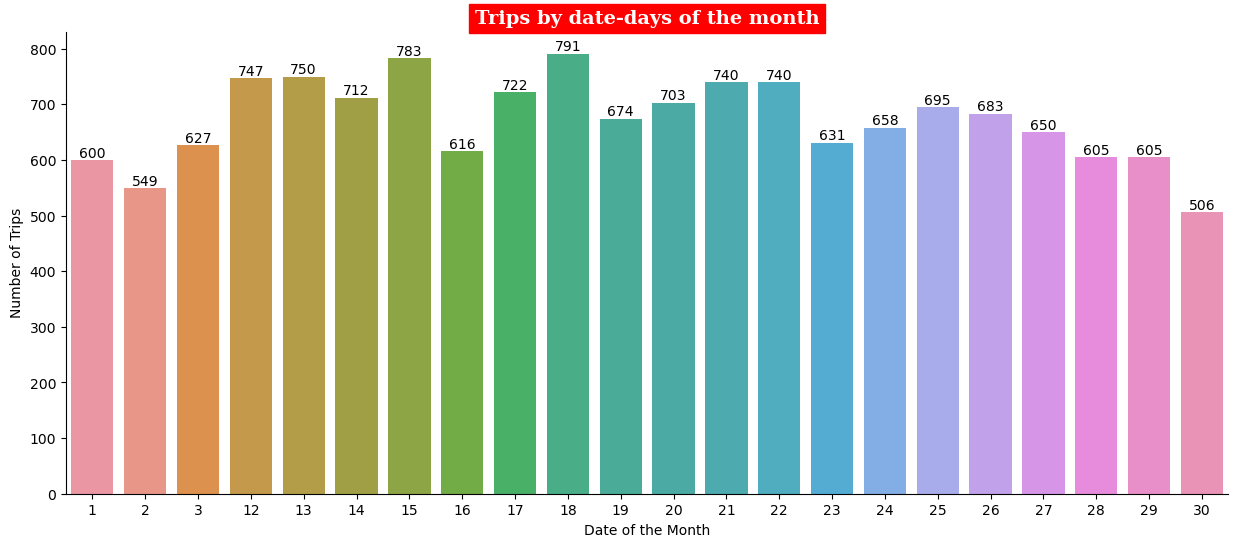

In [67]:
trips_by_dateday = trip_df.groupby(by = 'trip_creation_dayofdate')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (15, 6))
sns.barplot(data =trip_df,x = trips_by_dateday['trip_creation_dayofdate'],y = trips_by_dateday['trip_uuid'])
for i, count in enumerate(trips_by_dateday['trip_uuid']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Trips by date-days of the month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.xlabel('Date of the Month')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

# Outlier Detection & Treatment

In [68]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   route_type                      14787 non-null  category      
 3   od_start_time                   14787 non-null  datetime64[ns]
 4   od_end_time                     14787 non-null  datetime64[ns]
 5   od_time_diff_hour               14787 non-null  float64       
 6   trip_creation_time              14787 non-null  datetime64[ns]
 7   trip_creation_month             14787 non-null  int64         
 8   trip_creation_year              14787 non-null  int64         
 9   trip_creation_day               14787 non-null  int64         
 10  trip_creation_hour              14787 non-null  int64         
 11  tr

In [69]:
numerical_columns = trip_df.select_dtypes(include=[np.int64, np.float64])
numerical_columns

,od_time_diff_hour,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,trip_creation_dayofdate
0,37.0,9,2018,12,0,2,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,820.0,474.0,649.8528,12
1,2.0,9,2018,12,0,2,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,95.0,39.0,55.9899,12
2,64.0,9,2018,12,0,2,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,2700.0,1710.0,2227.5270,12
3,1.0,9,2018,12,0,2,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766,12
4,11.0,9,2018,12,0,2,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,63.0,26.0,29.5697,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,3.0,10,2018,3,23,2,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,49.0,34.0,35.9560,3
14783,1.0,10,2018,3,23,2,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883,3
14784,6.0,10,2018,3,23,2,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,91.0,52.0,69.4497,3
14785,3.0,10,2018,3,23,2,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,29.0,14.0,16.0184,3


In [70]:
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
od_time_diff_hour,14787.0,7.958477,10.843134,0.000000,2.000000,4.000000,9.000000,131.000000
trip_creation_month,14787.0,9.120105,0.325096,9.000000,9.000000,9.000000,9.000000,10.000000
trip_creation_year,14787.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
trip_creation_day,14787.0,18.375127,7.882198,1.000000,14.000000,19.000000,25.000000,30.000000
trip_creation_hour,14787.0,12.456212,7.987387,0.000000,4.000000,14.000000,20.000000,23.000000
trip_creation_weekday,14787.0,2.920944,1.927690,0.000000,1.000000,3.000000,5.000000,6.000000
start_scan_to_end_scan,14787.0,529.399405,658.201130,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000


In [71]:
trip_df.describe(include = object).T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
data,14787,2,training,10645
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
source_city,14787,714,Gurgaon,1128
source_state,14787,29,Maharashtra,2714
source_place,14787,748,Bilaspur,1074
destination_name,14787,1042,Gurgaon_Bilaspur_HB (Haryana),745
destination_city,14787,852,Mumbai,1084
destination_state,14787,32,Maharashtra,2569
destination_place,14787,832,Central,796


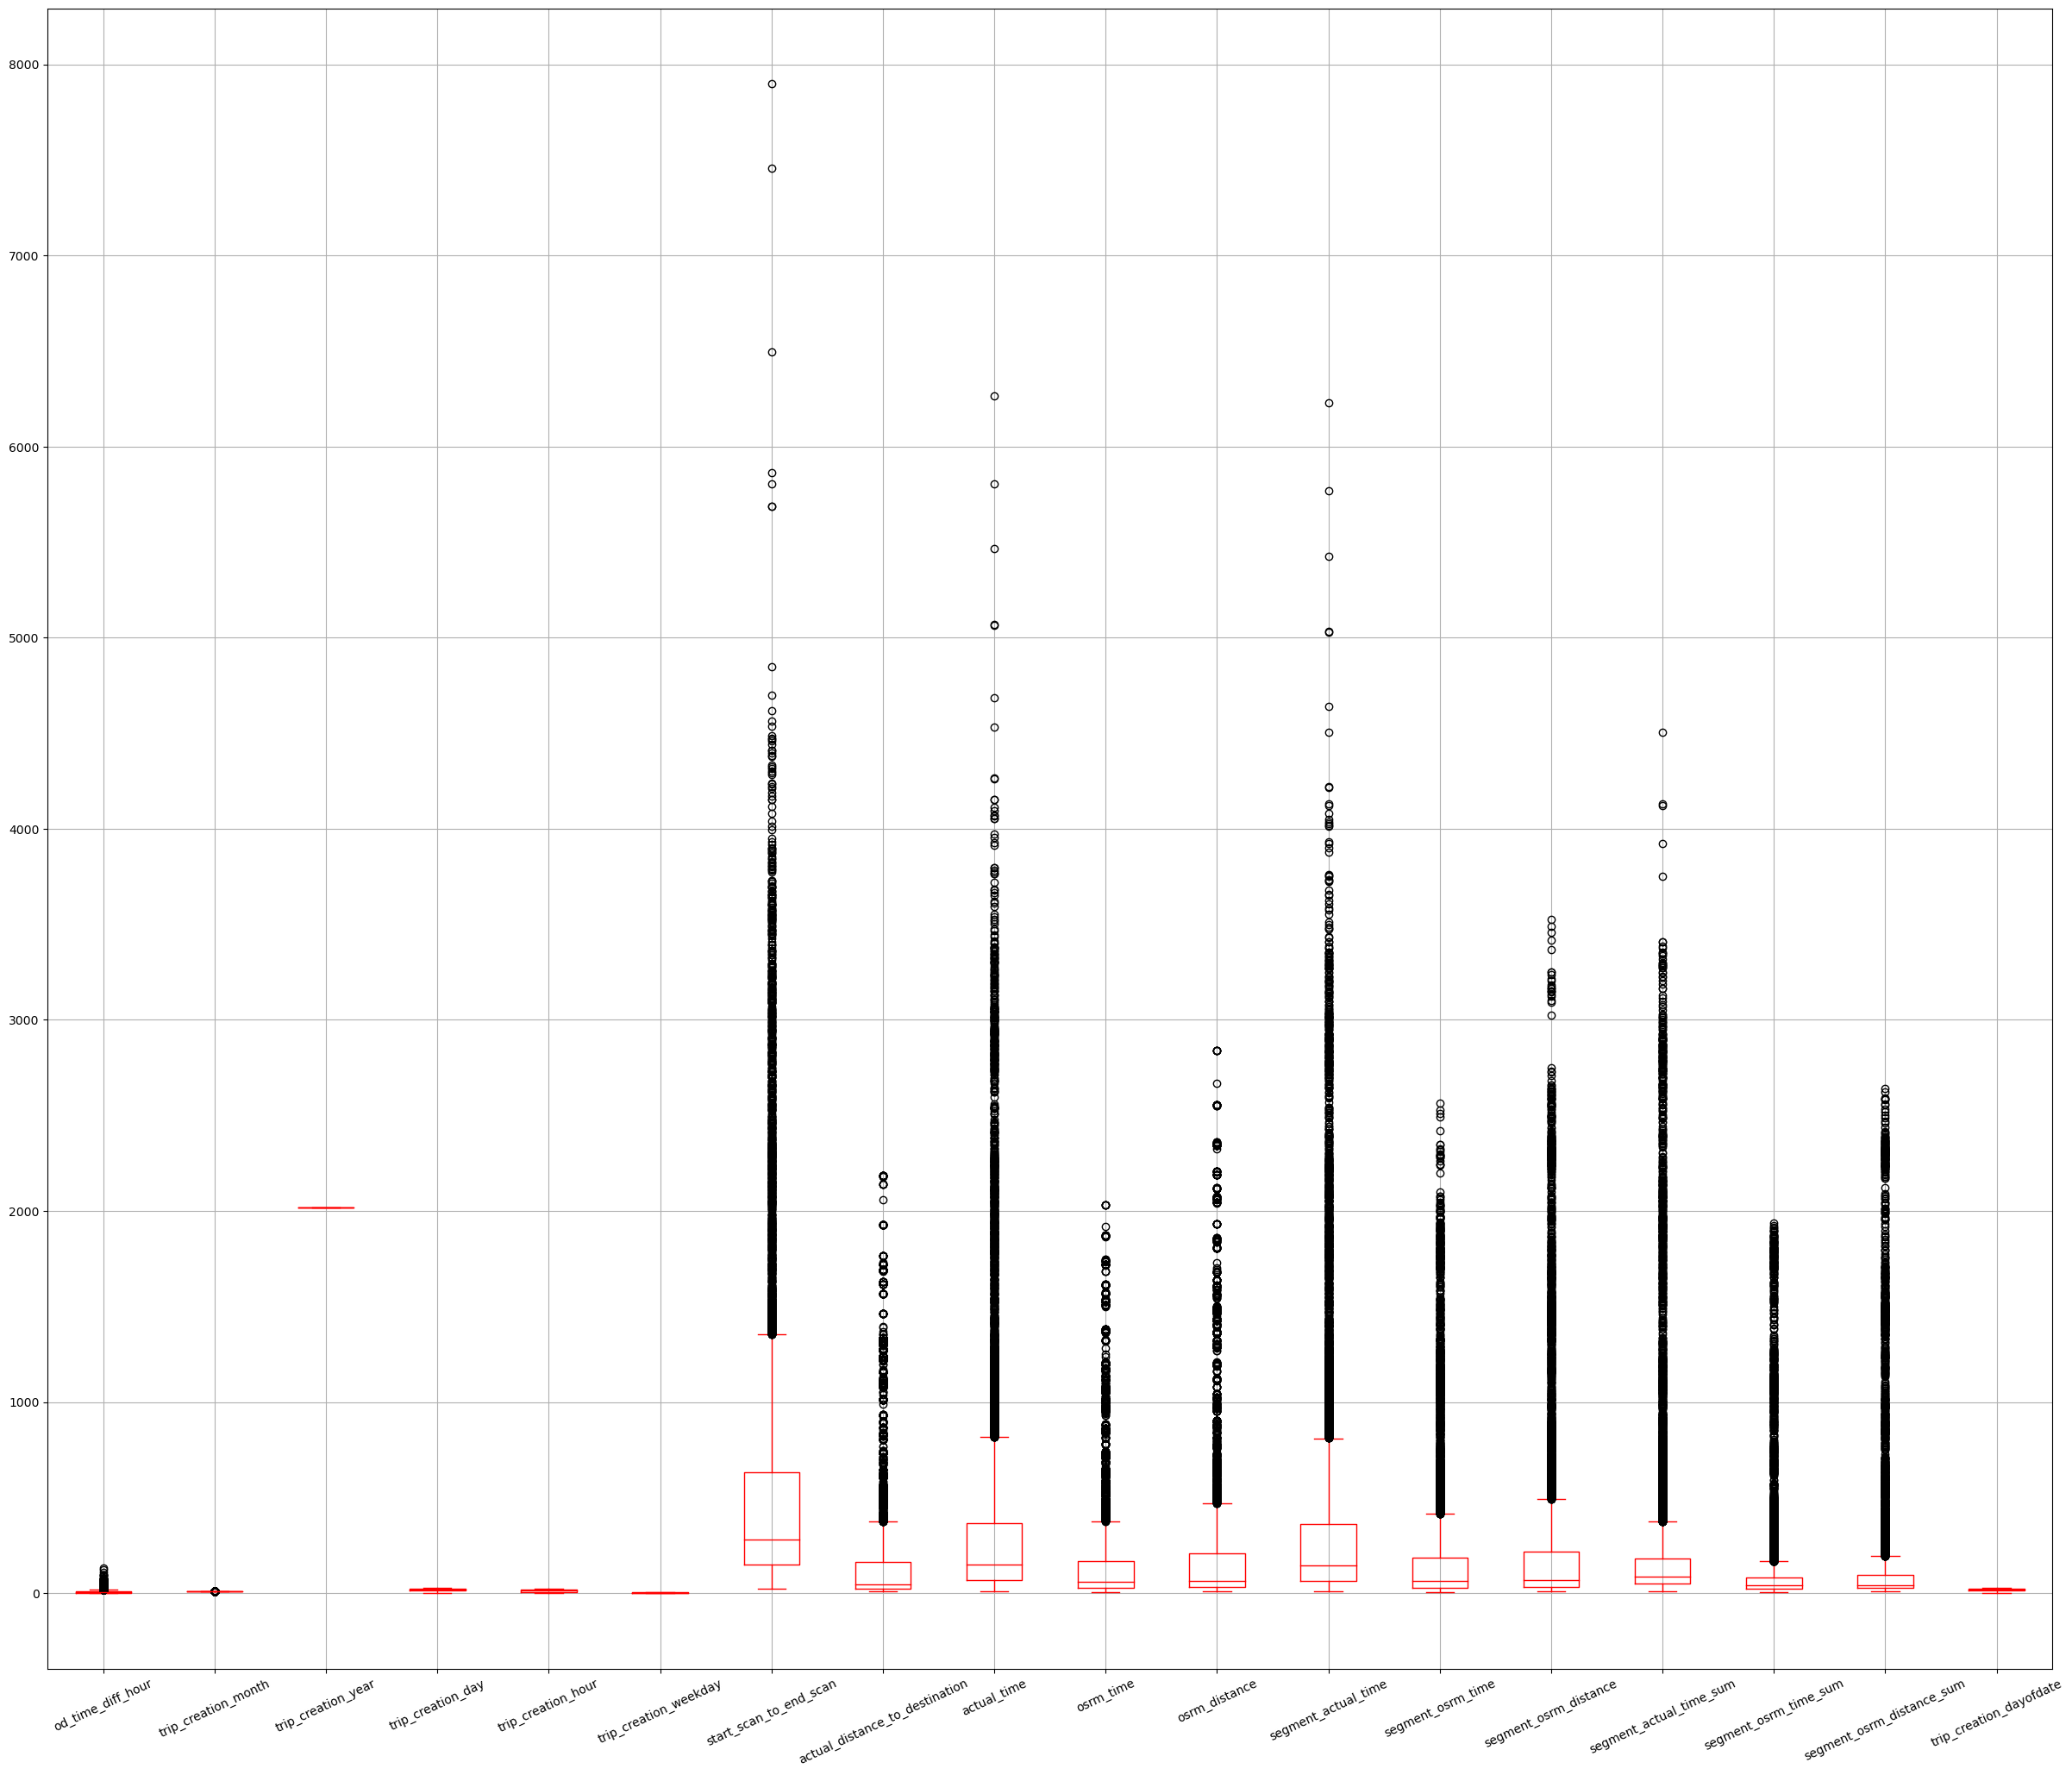

In [72]:
plt.figure(figsize=(30, 25))
numerical_columns.boxplot(rot=25, figsize=(35,20), color = 'r')
plt.grid('off')
plt.show()

In [73]:
# Extract only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Detect outliers and visualize using boxplot
def visualize_outliers(df):
    # Plotting boxplots for each numerical column
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df)
    plt.title('Boxplot of Numerical Features (Outliers Detection)')
    plt.show()

# Handle outliers using the IQR method
def handle_outliers_iqr(df):
    # For each column in the numerical DataFrame
    for col in df.columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        # Define the bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers by replacing them with NaN or any other method
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

    return df

<Figure size 3000x2500 with 0 Axes>

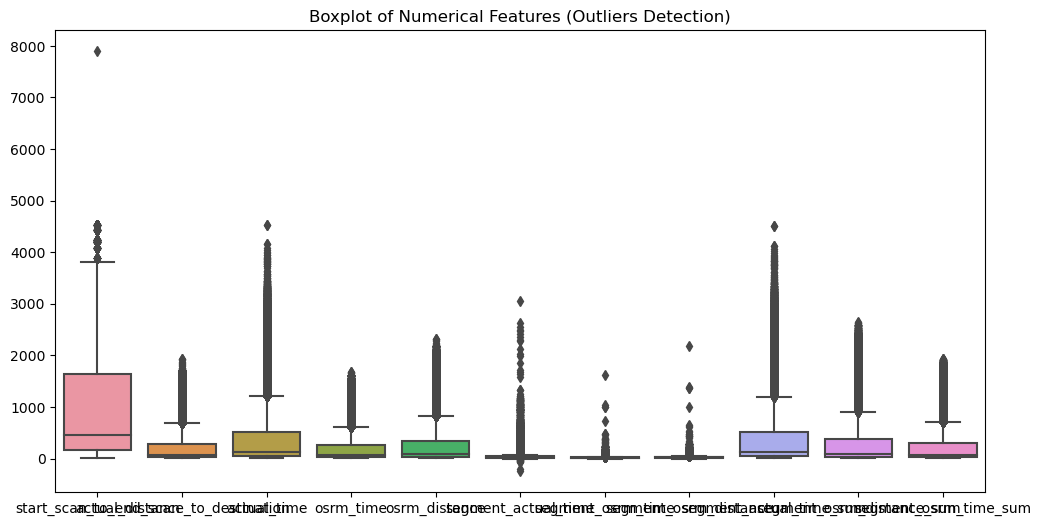

In [74]:
# Visualize the existing outliers in the numerical columns
plt.figure(figsize = (30,25))
visualize_outliers(numerical_df)

In [75]:
# Handle outliers and get the cleaned numerical DataFrame
df_cleaned = handle_outliers_iqr(numerical_df)

# Visualize after handling outliers
print("\nNumerical DataFrame after handling outliers using IQR method:")
print(df_cleaned)


Numerical DataFrame after handling outliers using IQR method:
        start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                         86.0                       10.435660         14.0   
1                         86.0                       18.936842         24.0   
2                         86.0                       27.637279         40.0   
3                         86.0                       36.118028         62.0   
4                         86.0                       39.386040         68.0   
...                        ...                             ...          ...   
144862                   427.0                       45.258278         94.0   
144863                   427.0                       54.092531        120.0   
144864                   427.0                       66.163591        140.0   
144865                   427.0                       73.680667        158.0   
144866                   427.0                       70.039010      

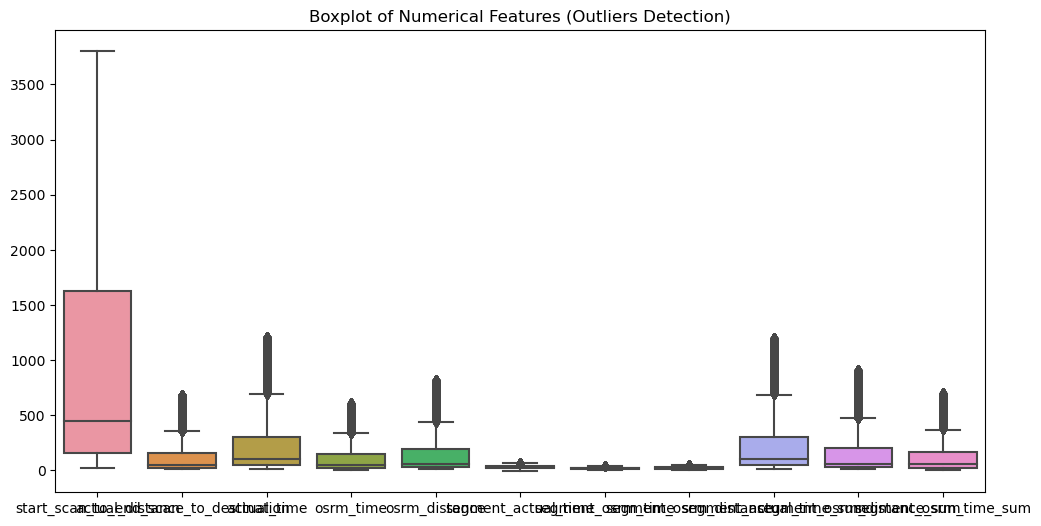

In [76]:
# Visualizing again to see the effect of outlier treatment
visualize_outliers(df_cleaned)

### one-hot encoding 

In [77]:
categorical_cols = ['data','route_type']

In [78]:
# one hot encoding the categorical features
ohe = OneHotEncoder(sparse=False)
encoded_cat_cols = ohe.fit_transform(trip_df[categorical_cols])

categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))
display(categorical_encoded_df)

encoded_df = pd.concat([trip_df,categorical_encoded_df],axis=1)
encoded_df

,data_test,data_training,route_type_Carting,route_type_FTL
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
14782,1.0,0.0,1.0,0.0
14783,1.0,0.0,1.0,0.0
14784,1.0,0.0,1.0,0.0
14785,1.0,0.0,1.0,0.0


,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,source_name,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place,trip_creation_day_week,trip_creation_dayofdate,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.0,2018-09-12 00:00:16.535741,9,2018,12,0,2,37,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,820.0,474.0,649.8528,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur,Wednesday,12,0.0,1.0,0.0,1.0
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,2.0,2018-09-12 00:00:22.886430,9,2018,12,0,2,37,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,95.0,39.0,55.9899,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,Karnataka,ChikaDPP,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr,Wednesday,12,0.0,1.0,1.0,0.0
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,64.0,2018-09-12 00:00:33.691250,9,2018,12,0,2,37,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,2700.0,1710.0,2227.5270,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur,Wednesday,12,0.0,1.0,0.0,1.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.0,2018-09-12 00:01:00.113710,9,2018,12,0,2,37,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766,Mumbai Hub (Maharashtra),Mumbai,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd,Wednesday,12,0.0,1.0,1.0,0.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.0,2018-09-12 00:02:09.740725,9,2018,12,0,2,37,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,63.0,26.0,29.5697,Bellary_Dc (Karnataka),Bellary,Karnataka,Dc (Karnataka),Hospet (Karnataka),Hospet,Karnataka,(Karnataka),Wednesday,12,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,3.0,2018-10-03 23:55:56.258533,10,2018,3,23,2,40,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,49.0,34.0,35.9560,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur,Zirakpur_DC (Punjab),Zirakpur,Punjab,DC (Punjab),Wednesday,3,1.0,0.0,1.0,0.0
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.0,2018-10-03 23:57:23.863155,10,2018,3,23,2,40,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883,FBD_Balabhgarh_DPC (Haryana),FBD,Haryana,Balabhgarh,Faridabad_Blbgarh_DC (Haryana),Faridabad,Haryana,Blbgarh,Wednesday,3,1.0,0.0,1.0,0.0
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,6.0,2018-10-03 23:57:44.429324,10,2018,3,23,2,40,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,91.0,52.0,69.4497,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur,Uttar Pradesh,GovndNgr,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central,Wednesday,3,1.0,0.0,1.0,0.0
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,3.0,2018-10-03 23:59:14.390954,10,2018,3,23,2,40,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,29.0,14.0,16.0184,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli,Tamil Nadu,Vdkk

## Normalize/ Standardize the numerical features using MinMaxScaler orStandardScaler

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [80]:
numerical_columns = [
    'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 
    'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 
    'segment_osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum', 
    'segment_osrm_time_sum'
]

# Choose either MinMaxScaler or StandardScaler
scaler = MinMaxScaler()  # For normalization (scales data between 0 and 1)
# scaler = StandardScaler()  # For standardization (scales data to have mean 0 and variance 1)

trip_df_standardized = trip_df.copy()

# Apply scaler to the numerical features
trip_df_standardized[numerical_columns] = scaler.fit_transform(trip_df[numerical_columns])

# Display the final DataFrame with scaled numerical features
trip_df_standardized.head()

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,source_name,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place,trip_creation_day_week,trip_creation_dayofdate
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.0,2018-09-12 00:00:16.535741,9,2018,12,0,2,37,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134,0.180423,0.242236,0.243471,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur,Wednesday,12
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,2.0,2018-09-12 00:00:22.886430,9,2018,12,0,2,37,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373,0.019132,0.017081,0.017827,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,Karnataka,ChikaDPP,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr,Wednesday,12
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,64.0,2018-09-12 00:00:33.691250,9,2018,12,0,2,37,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625,0.598665,0.881988,0.842925,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur,Wednesday,12
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.0,2018-09-12 00:01:00.113710,9,2018,12,0,2,37,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074,0.011123,0.005176,0.004105,Mumbai Hub (Maharashtra),Mumbai,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd,Wednesday,12
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.0,2018-09-12 00:02:09.740725,9,2018,12,0,2,37,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185,0.012013,0.010352,0.007788,Bellary_Dc (Karnataka),Bellary,Karnataka,Dc (Karnataka),Hospet (Karnataka),Hospet,Karnataka,(Karnataka),Wednesday,12


# Hypothesis Testing

1. Perform hypothesis testing / visual analysis between :

* a. actual_time aggregated value and OSRM time aggregated value.
* b. actual_time aggregated value and segment actual time aggregatedvalue.
* c. OSRM distance aggregated value and segment OSRM distanceaggregated value.
* d. OSRM time aggregated value and segment OSRM time aggregated value.

I will be using t-test to conduct the hypothesis testing.

The t-test in statistics is used to determine if there is a significant difference between the means of two groups. 

It relies on several assumptions, which are important to ensure the validity of the results:

1. Independence:
The observations within each group must be independent of each other. This means the values in one group should not influence the values in another group.
2. Normality:
The data in each group should be approximately normally distributed. This assumption is particularly important when the sample size is small. For larger sample sizes, the t-test is generally robust to deviations from normality due to the Central Limit Theorem.
3. Homogeneity of Variances (for two-sample t-tests):
The variances of the two groups should be approximately equal. This assumption applies to the Student's t-test (also known as the equal variances or pooled t-test). If this assumption is violated, you should use Welch’s t-test, which does not assume equal variances.

#### Checking assumptions:
* Normality can be tested using tests like the Shapiro-Wilk test or by visualizing the data with a Q-Q plot.
* Homogeneity of variances can be checked with Levene’s test or Bartlett’s test.
* If these assumptions are not met, you might need to use non-parametric alternatives like the Mann-Whitney U test (for independent samples) or the Wilcoxon signed-rank test (for paired samples).

In [81]:
df_cleaned.shape

(144316, 11)

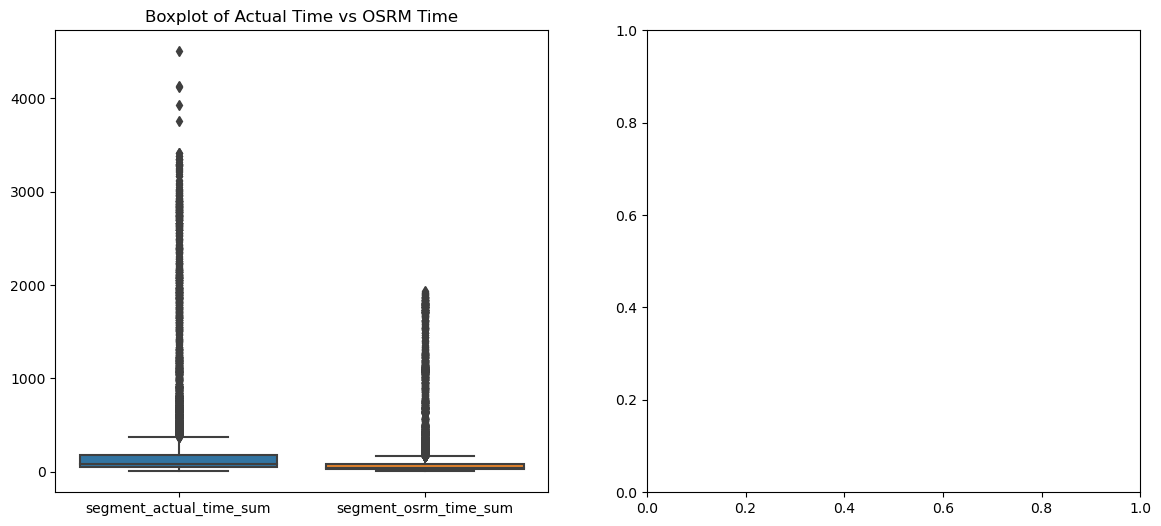

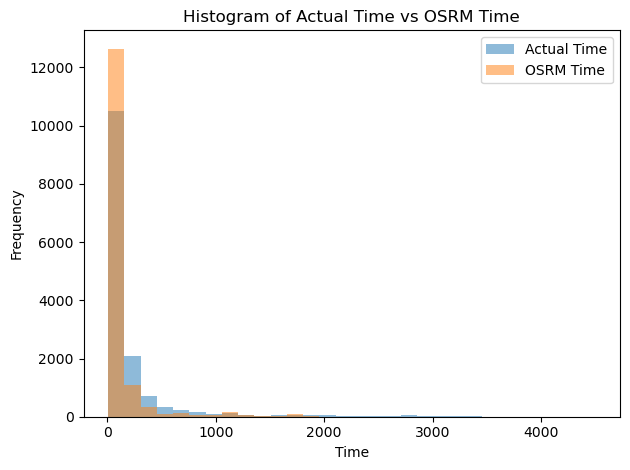

T-statistic: 26.58888085165666
P-value: 5.912590927426666e-154
Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.


In [82]:
def visualize_data(df):
    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[['segment_actual_time_sum', 'segment_osrm_time_sum']])
    plt.title('Boxplot of Actual Time vs OSRM Time')

    # Histogram
    plt.subplot(1, 2, 2)
    df[['segment_actual_time_sum', 'segment_osrm_time_sum']].plot(kind='hist', alpha=0.5, bins=30)
    plt.title('Histogram of Actual Time vs OSRM Time')
    plt.xlabel('Time')
    plt.legend(['Actual Time', 'OSRM Time'])

    plt.tight_layout()
    plt.show()

# Perform Paired t-test
def hypothesis_test(df):
    # Paired t-test: Compare means of paired samples
    t_stat, p_value = ttest_ind(df['segment_actual_time_sum'], df['segment_osrm_time_sum'])

    # Print results
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between actual_time and osrm_time.")

# Visualize the data
visualize_data(trip_df)

# Perform hypothesis testing
hypothesis_test(trip_df)

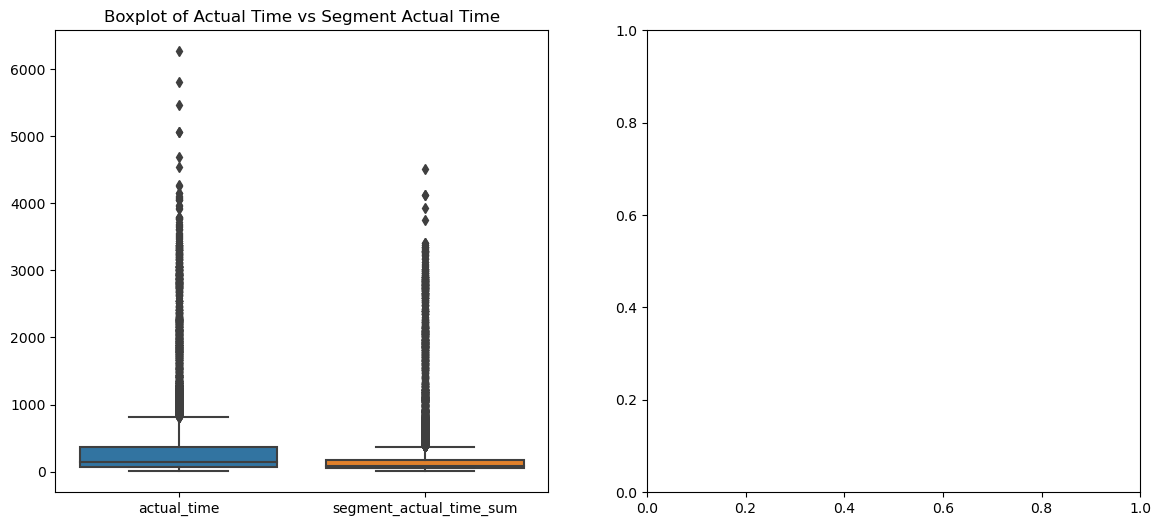

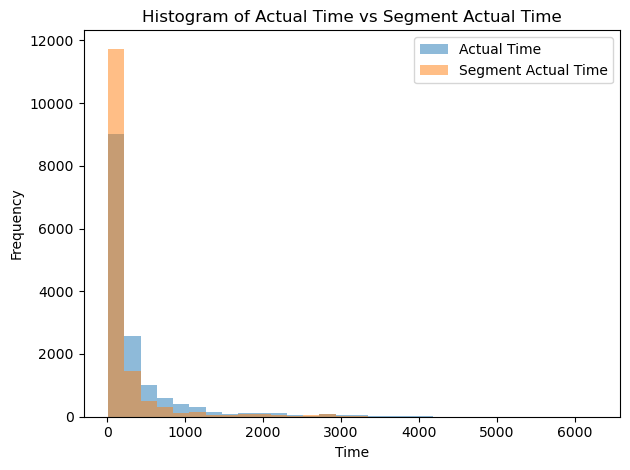

T-statistic: 22.33316236472505
P-value: 1.4204146727855588e-109
Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time.


In [83]:
def visualize_data(df):
    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[['actual_time', 'segment_actual_time_sum']])
    plt.title('Boxplot of Actual Time vs Segment Actual Time')

    # Histogram
    plt.subplot(1, 2, 2)
    df[['actual_time', 'segment_actual_time_sum']].plot(kind='hist', alpha=0.5, bins=30)
    plt.title('Histogram of Actual Time vs Segment Actual Time')
    plt.xlabel('Time')
    plt.legend(['Actual Time', 'Segment Actual Time'])

    plt.tight_layout()
    plt.show()

# Perform Paired t-test
def hypothesis_test(df):
    # Paired t-test: Compare means of paired samples
    t_stat, p_value = ttest_ind(df['actual_time'], df['segment_actual_time_sum'])

    # Print results
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between actual_time and segment_actual_time.")

# Visualize the data
visualize_data(trip_df)

# Perform hypothesis testing
hypothesis_test(trip_df)

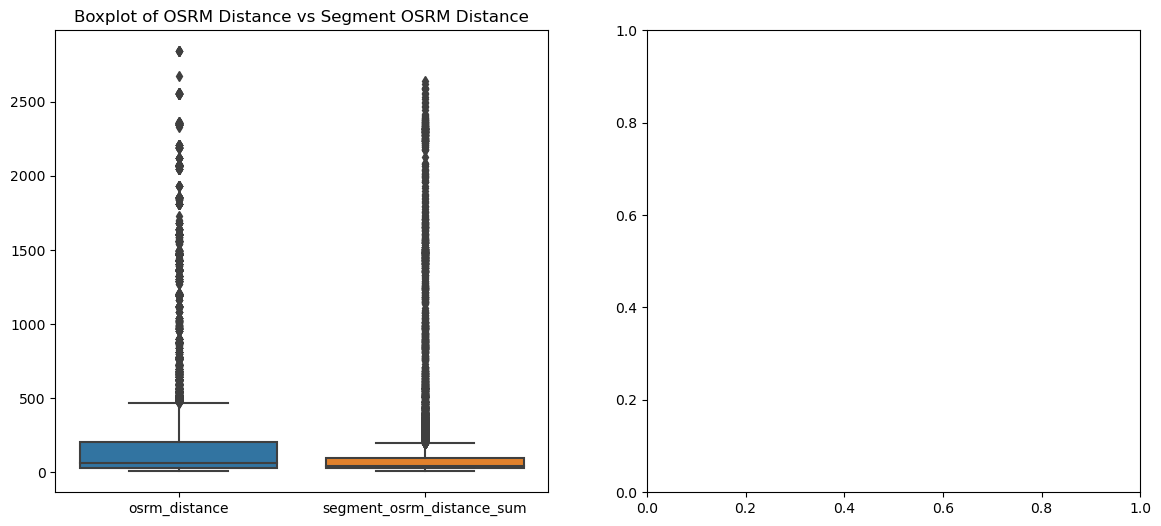

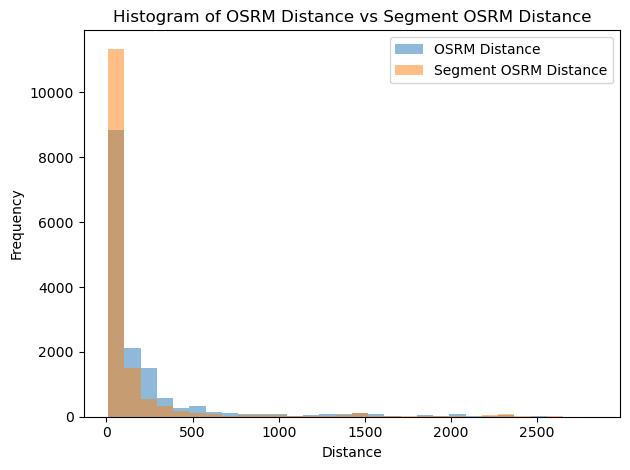

T-statistic: 15.070151764372962
P-value: 3.942757559431269e-51
Reject the null hypothesis: There is a significant difference between OSRM distance and segment OSRM distance.


In [84]:
def visualize_data(df):
    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[['osrm_distance', 'segment_osrm_distance_sum']])
    plt.title('Boxplot of OSRM Distance vs Segment OSRM Distance')

    # Histogram
    plt.subplot(1, 2, 2)
    df[['osrm_distance', 'segment_osrm_distance_sum']].plot(kind='hist', alpha=0.5, bins=30)
    plt.title('Histogram of OSRM Distance vs Segment OSRM Distance')
    plt.xlabel('Distance')
    plt.legend(['OSRM Distance', 'Segment OSRM Distance'])

    plt.tight_layout()
    plt.show()

# Perform Paired t-test
def hypothesis_test(df):
    # Paired t-test: Compare means of paired samples
    t_stat, p_value = ttest_ind(df['osrm_distance'], df['segment_osrm_distance_sum'])

    # Print results
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between OSRM distance and segment OSRM distance.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between OSRM distance and segment OSRM distance.")

# Visualize the data
visualize_data(trip_df)

# Perform hypothesis testing
hypothesis_test(trip_df)

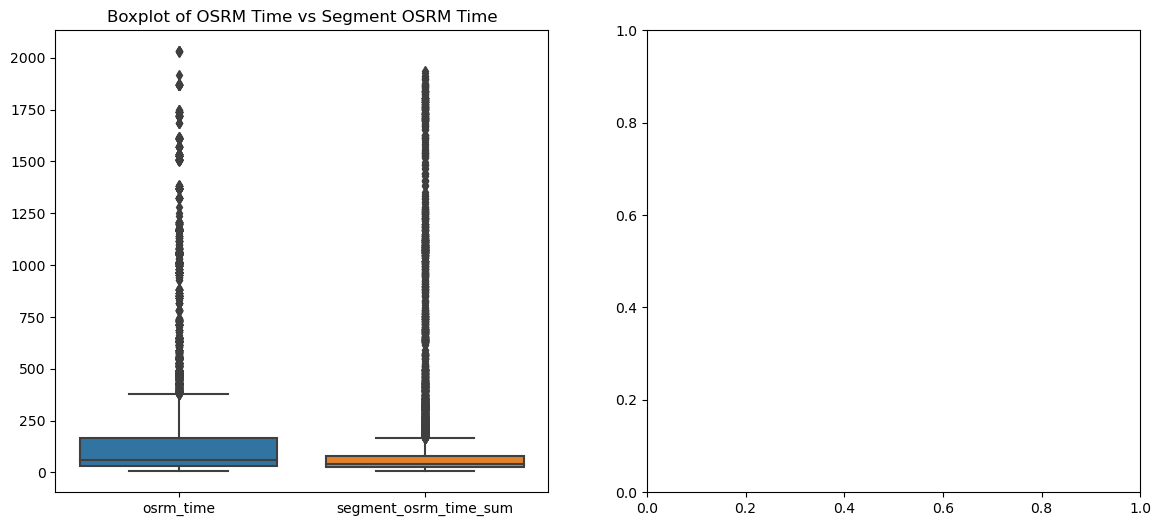

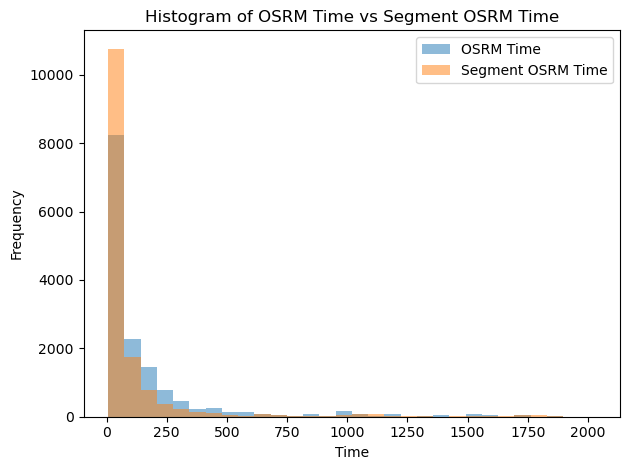

T-statistic: 37.50538196072766
P-value: 3.6755883922495114e-294
Reject the null hypothesis: There is a significant difference between OSRM time and segment OSRM time.


In [85]:
def visualize_data(df):
    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[['osrm_time', 'segment_osrm_time_sum']])
    plt.title('Boxplot of OSRM Time vs Segment OSRM Time')

    # Histogram
    plt.subplot(1, 2, 2)
    df[['osrm_time', 'segment_osrm_time_sum']].plot(kind='hist', alpha=0.5, bins=30)
    plt.title('Histogram of OSRM Time vs Segment OSRM Time')
    plt.xlabel('Time')
    plt.legend(['OSRM Time', 'Segment OSRM Time'])

    plt.tight_layout()
    plt.show()

# Perform Paired t-test
def hypothesis_test(df):
    # Paired t-test: Compare means of paired samples
    t_stat, p_value = ttest_rel(df['osrm_time'], df['segment_osrm_time_sum'])

    # Print results
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between OSRM time and segment OSRM time.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between OSRM time and segment OSRM time.")

# Visualize the data
visualize_data(trip_df)

# Perform hypothesis testing
hypothesis_test(trip_df)

In [86]:
# To find the busiest corridor, we'll look at the most common combinations of source and destination states
corridor_counts = trip_df.groupby(['source_state', 'destination_state']).size().reset_index(name='count')
busiest_corridor = corridor_counts.sort_values(by='count', ascending=False).head(1)

# Average distance and time taken for the busiest corridor
busiest_corridor_details = busiest_corridor.merge(trip_df, on=['source_state', 'destination_state'])
average_distance = busiest_corridor_details['actual_distance_to_destination'].mean()
average_time = busiest_corridor_details['od_time_diff_hour'].mean()

print("Busiest corridor:  ")
display(busiest_corridor)
print("Average distance:  ",average_distance)
print("Average time (in hours):  ",average_time)

Busiest corridor:  


,source_state,destination_state,count
85,Maharashtra,Maharashtra,2458


Average distance:   74.85284867694585
Average time (in hours):   4.679414157851912


# Business Insights

* The data covers the period from September 12, 2018, to October 8, 2018 (26 days).
* 88% of the trips occurred in October, with the remaining in November.
* The data distribution is heavily right-skewed.
* Almost all features are strongly positively correlated, which is intuitive.
* Trips are slightly lower at the start and end of the month compared to the mid-month, though the difference is minor.
* No trips were recorded from the 4th to the 11th day of the month.
* Most orders are placed mid-month, indicating a higher volume of bookings during that period..

**Route type:**
 
- The analysis shows that a larger share of shipments is routed via Full Truck Load (FTL) rather than carting. This has significant implications for both the efficiency and speed of the delivery process.

**Geographical Focus**:


Identifying the busiest routes and distances can aid in optimizing logistics operations, enhancing transportation efficiency, and potentially lowering costs.

- **State:** Haryana, Maharashtra, and Karnataka are not only active source states but also stand out as the busiest, highlighting high demand or substantial business activity originating from these regions.

- **source city:** Gurgaon, Bangalore, and Bhiwandi have been identified as the busiest source cities, indicating their critical role in driving overall business operations and transportation activities.

- **Destination city:** Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, underscoring their significance in terms of business activities or population movement.

- **Busiest corridor:** Overall, the busiest corridor is Mumbai_Maharashtra and Bangalore_Karnataka which has the maximum trips.
    - Average distance:   74.852844 kms
    - Average time (in hours):   5.346577921457034

**Delivery Time & Distance Accuracy:**

**OSRM Time vs. Actual Time:**
- The difference between the mean values of estimated delivery time and actual delivery time suggests that there may be variations or delays in the actual delivery process compared to the initial estimates.
- The fact that the mean of OSRM time is less than the mean of actual delivery time indicates that the estimated times provided by the OSRM (Open Source Routing Machine) service tend to be optimistic. 

**OSRM Distance vs. Actual Distance:**
- The mean of OSRM distance being greater than the mean of actual distance to the destination suggests that the OSRM might overestimate the distances. This could impact route planning and fuel efficiency calculations.

**Segment-wise time Analysis:**
- The equality in the mean values of actual time and segment actual time suggests that the time measurements are consistent across different segments of the delivery process

**Segment-wise distance Analysis:**
- The mean of segment OSRM distance being greater than the mean of OSRM distance implies that the OSRM might provide more conservative estimates for distance within individual segments. 

**Further look into :**
* As its depicted from the analysis that there is absolutely no trip from 4th- 11th day of the month, The reason for that can be figured out and catered to receive the orders in the these dates as well.

* More ways to promote FTL route handling system can be implemented to increase this percentage

-----

# Business Recommendation

Business Recommendations:

1.	Route Optimization:
•	With Karnataka being the busiest state for transportation routes, optimizing the network within the state could enhance efficiency and reduce congestion. Implementing route optimization algorithms and real-time traffic monitoring would further improve the system.
•	Given that Gurgaon and Bangalore are the busiest source and destination cities, respectively, city-specific strategies should be developed to effectively manage the high volume of traffic in these areas.
2.	Operational Efficiency:
•	Since the average OSRM time is lower than the actual delivery time, businesses can use this insight to set more realistic delivery time expectations for customers.
•	As the average OSRM distance exceeds the actual distance, businesses should adjust their distance estimates to improve the accuracy of logistics planning.
•	With the segment OSRM distance also greater than the overall OSRM distance, and actual distance data available, businesses can leverage this information to fine-tune route planning and optimize logistics for specific segments.
•	Advanced demand forecasting techniques should be implemented to predict peak travel times, allowing businesses to adjust transportation services accordingly. This proactive approach will enable better resource allocation and help minimize congestion during busy periods.
•	Overall, the analysis points to opportunities for operational improvement. Businesses can focus on refining their route planning, addressing discrepancies in time and distance estimates, and streamlining processes across various delivery stages to enhance overall efficiency.
3.	Customer Satisfaction:
•	Enhancing the accuracy of delivery time and distance estimates can lead to improved customer satisfaction.
•	Full Truck Load (FTL) shipments contribute to faster delivery times, which positively impacts customer satisfaction. Customers value timely deliveries, and the focus on FTL shipments aligns with meeting or exceeding their expectations for delivery speed.
4.	Customer Profiling:
•	Profiling customers from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh will provide insights into why a large volume of orders originates from these states and help businesses improve the buying and delivery experience for these customers.
5.	Cost Optimization:
•	Understanding the discrepancies between estimated and actual times and distances can support cost optimization efforts.
•	Fine-tuning logistics planning based on more accurate data can lead to better resource allocation and potentially reduce operational costs.
6.	Strategic Decision-Making:
•	The preference for FTL over carting highlights a strategic decision by logistics management.
•	Continuously evaluating the impact of this choice and understanding the reasons behind it can inform future decision-making and help businesses adapt to changing needs.
7.	Collaboration with Stakeholders:
•	Collaborating with stakeholders, including government authorities, transportation companies, and local communities, will be crucial in developing comprehensive strategies to manage and optimize transportation in the busiest corridors and cities.
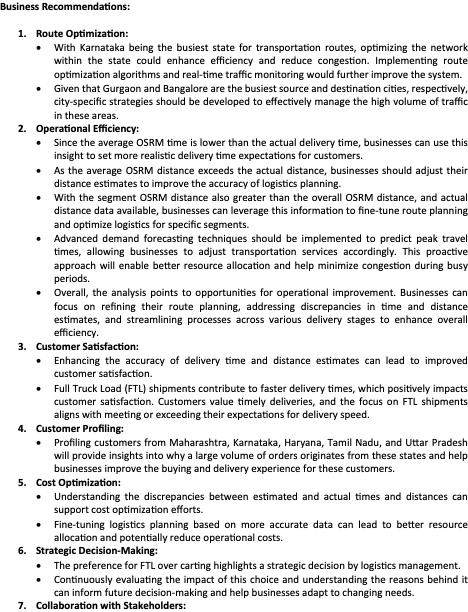